---
# 1. 필요 라이브러리 설치 및 불러오기
---

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)


'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

- 코랩 한글 설정

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,922 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

- SentencePiece 설치

In [3]:
pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 7.2 MB/s 


In [119]:
import sentencepiece as spm
import pandas as pd 
import tensorflow as tf
import re
from tqdm import tqdm
import random
import matplotlib.ticker as ticker
import seaborn as sns
import os
from tqdm.notebook import tqdm
import numpy as np

In [90]:
# cd /content/drive/MyDrive/aiffel/Going_Deeper/GD10/data

/content/drive/MyDrive/aiffel/Going_Deeper/GD10/data


---
# 2. 데이터 정제 및 토큰화
---

In [92]:
with open("/content/drive/MyDrive/aiffel/Going_Deeper/GD8/data/korean-english-park.train.ko","r") as f:
    train_ko = f.read().splitlines()

with open("/content/drive/MyDrive/aiffel/Going_Deeper/GD8/data/korean-english-park.train.en","r") as f:
    train_en = f.read().splitlines()    

train = pd.DataFrame(zip(train_ko, train_en), columns = ['ko','en'])
train

,ko,en
0,"개인용 컴퓨터 사용의 상당 부분은 ""이것보다 뛰어날 수 있느냐?""","Much of personal computing is about ""can you t..."
1,모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하...,so a mention a few weeks ago about a rechargea...
2,그러나 이것은 또한 책상도 필요로 하지 않는다.,"Like all optical mice, But it also doesn't nee..."
3,"79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분...",uses gyroscopic sensors to control the cursor ...
4,정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔...,Intelligence officials have revealed a spate o...
...,...,...
94118,“우리는 3월 8일 김승연 회장과 그의 아들이 보복폭행에 가담한 혐의를 찾기 위해 ...,””We are hoping to seize material evidence to ...
94119,월요일 술집 종업원 6명은 김회장과 아들에게 폭행을 당했음을 진술했다고 경찰은 말했다.,"” On Monday, police secured statements from si..."
94120,그러나 불충분한 증거 확보로 수사에 어려움이 있다.,But the lack of material evidence is making it...
94121,김회장과 그의 아들은 보복폭행 혐의를 강력히 부인하고 있다.,Kim and his son both deny the allegations.


---
### 2-1 중복 제거
----

- 전체 개수

In [93]:
len(train)

94123

- 중복 개수

In [94]:
train[train.duplicated()]

,ko,en
7789,이들 의원 중 1명은 빌 클린턴 전 대통령이 지난 몇 주간 부인 힐러리에게 오바마의...,"One of the lawmakers said Clinton's husband, f..."
9925,*판매 제품,The goods
10070,* 알아두면 좋은 것:,Good to know:
10074,* 알아두면 좋은 것:,Good to know:
10079,* 알아두면 좋은 것:,Good to know:
...,...,...
93792,"힐러리 클린턴, 북한 방문할까",Would Hillary Clinton visit North Korea?
93793,"이라크 새 의회, 첫 개정",Iraq’s new assembly is going to hold its first...
93933,"노 대통령 검찰, 민주적 통제 받아야 2005.12",Roh says prosecutors need civilian control.
94002,"카우치 멤버, 사전 모의 시인 2005.09",Members of The Couch planned it before the show.


- 중복 제거

In [95]:
train.drop_duplicates(keep = 'first', inplace = True, ignore_index = True)
train.shape

(78968, 2)

---
### 2-2 데이터 정제
---

In [96]:
def preprocess_sentence(sentence, s_token=False, e_token=False):
    
    sentence = sentence.lower().strip() # 모든 입력을 소문자로 변환
    sentence = re.sub(r"([?.!])", r" \1 ", sentence) # 문장부호 양옆에 공백 추가
    sentence = re.sub(r"[,]", "",sentence) # 2,000과 같은 자리수표시한는 ',' 삭제
    sentence = re.sub(r'[" "]+', " ", sentence)  # 다수의 공백 하나의 공백으로 변환
    sentence = re.sub(r"[^a-zA-Z0-9?.!가-힣ㄱ-ㅎㅏ-ㅣ]+", " ", sentence) # 한글,영어,?.! 제외하고 나머지 제거
    sentence = sentence.strip() # 문장의 앞뒤 공백 제거
    
    return sentence

In [97]:
train['ko'] = train['ko'].apply(lambda x: preprocess_sentence(x))
train['en'] = train['en'].apply(lambda x: preprocess_sentence(x))

---
### 2-3 짧은 문장 제거
---

- 한글 기준 5보다 작은 수는 의미 없는 단어들이 많으니 해당 값 제거

In [98]:
small_len_list = []
for i in range(len(train)):
  if len(train['ko'][i]) < 5:
    small_len_list.append(i)

In [99]:
print(len(small_len_list))

162


- 짧은 문장 처리 전 길이

In [100]:
train.shape

(78968, 2)

In [101]:
train = train.drop(index = small_len_list, axis = 0)
train.reset_index(drop = True, inplace = True)
train.shape

(78806, 2)

---
### 2-4 토큰화
---

In [102]:
kor_corpus = train['ko'].to_list()
eng_corpus = train['en'].to_list()

In [103]:
# 토큰화
def generate_tokenizer(corpus,
                       vocab_size,
                       model_type='unigram',
                       lang="ko",
                       pad_id=0,
                       bos_id=1,
                       eos_id=2,
                       unk_id=3):   
    
    input_file = f'{lang}_spm_input.txt'

    with open(input_file, 'w', encoding='utf-8') as f:
        for row in corpus: f.write('{}\n'.format(row))
    
    sp_model_root ='sentencepiece'
    if not os.path.isdir(sp_model_root): os.mkdir(sp_model_root)

    prefix = 'tokenizer_%s_%s' % (lang, model_type+str(vocab_size))
    prefix = os.path.join(sp_model_root, prefix)
    character_coverage = 1.0
    input_argument = '--input=%s --pad_id=%s --bos_id=%s --eos_id=%s --unk_id=%s --model_prefix=%s --vocab_size=%s --character_coverage=%s --model_type=%s'
    cmd = input_argument%(input_file, pad_id, bos_id, eos_id, unk_id, prefix, vocab_size, character_coverage, model_type)

    spm.SentencePieceTrainer.Train(cmd)
    tokenizer = spm.SentencePieceProcessor()
    tokenizer.Load(f'{prefix}.model')

    return tokenizer

In [104]:
SRC_VOCAB_SIZE = TGT_VOCAB_SIZE = 20000

ko_tokenizer = generate_tokenizer(kor_corpus, SRC_VOCAB_SIZE, lang="ko")
en_tokenizer = generate_tokenizer(eng_corpus, TGT_VOCAB_SIZE, lang="en")

en_tokenizer.set_encode_extra_options("bos:eos")

True

In [105]:
# 토큰의 길이가 50 이하인 데이터를 선별

src_corpus = []
tgt_corpus = []

assert len(kor_corpus) == len(eng_corpus)

# 토큰의 길이가 50 이하인 문장만 남깁니다. 
for idx in tqdm(range(len(kor_corpus))):
    src = ko_tokenizer.EncodeAsIds(kor_corpus[idx])
    tgt = en_tokenizer.EncodeAsIds(eng_corpus[idx])
    
    if len(src) <= 50 and len(tgt) <= 50 :
        src_corpus.append(src)
        tgt_corpus.append(tgt)

# 패딩처리를 완료하여 학습용 데이터를 완성합니다.
enc_train = tf.keras.preprocessing.sequence.pad_sequences(src_corpus, padding='post')
dec_train = tf.keras.preprocessing.sequence.pad_sequences(tgt_corpus, padding='post')

  0%|          | 0/78806 [00:00<?, ?it/s]

In [170]:
print(len(enc_train))
print(len(dec_train))

72760
72760


- 한글 토큰화 확인

In [147]:
vocab_file = "/content/drive/MyDrive/aiffel/Going_Deeper/GD10/data/sentencepiece/tokenizer_ko_unigram20000.model"
vocab = spm.SentencePieceProcessor()
vocab.load(vocab_file)

lines_ko = [
  "월요일 술집 종업원 6명은 김회장과 아들에게 폭행을 당했음을 진술했다고 경찰은 말했다.",
  "그러나 불충분한 증거 확보로 수사에 어려움이 있다.",
  "김회장과 그의 아들은 보복폭행 혐의를 강력히 부인하고 있다"
]

for line in lines_ko:
  print(line)
  print(vocab.encode_as_pieces(line))
  print(vocab.encode_as_ids(line))
  print()

겨울이 되어서 날씨가 무척 추워요.
['▁겨울', '이', '▁되어', '서', '▁날씨', '가', '▁무척', '▁추', '워', '요', '.']
[3515, 13, 1620, 168, 2310, 11, 12264, 1462, 1397, 827, 19996]

이번 성탄절은 화이트 크리스마스가 될까요?
['▁이번', '▁성', '탄', '절', '은', '▁화이트', '▁크리스마스', '가', '▁될', '까요', '?']
[45, 506, 1583, 2065, 8, 4934, 2260, 11, 144, 9310, 19851]

겨울에 감기 조심하시고 행복한 연말 되세요.
['▁겨울', '에', '▁감기', '▁조심', '하', '시', '고', '▁행복한', '▁연말', '▁되', '세요', '.']
[3515, 12, 9643, 11512, 470, 102, 14, 12010, 6781, 1862, 9054, 19996]



- 영어 토큰화 확인

In [155]:
vocab_file = "/content/drive/MyDrive/aiffel/Going_Deeper/GD10/data/sentencepiece/tokenizer_en_unigram20000.model"
vocab = spm.SentencePieceProcessor()
vocab.load(vocab_file)

lines_en = [
  "than afl cio members got their noses out of joint because kmart buys ads in the detroit news where a nasty strike is in progress.",
  "it can also tell a doctor so the doctor can stop the surgery.",
  "energy department data showing demand for gasoline over the memorial day holiday period won t be released until next week."
]
for line in lines_en:
  print(line)
  print(vocab.encode_as_pieces(line))
  print(vocab.encode_as_ids(line))
  print()

than afl cio members got their noses out of joint because kmart buys ads in the detroit news where a nasty strike is in progress.
['▁than', '▁afl', '▁cio', '▁members', '▁got', '▁their', '▁nose', 's', '▁out', '▁of', '▁joint', '▁be', 'cause', '▁kma', 'rt', '▁buy', 's', '▁ads', '▁in', '▁the', '▁detroit', '▁news', '▁where', '▁a', '▁nas', 'ty', '▁strike', '▁is', '▁in', '▁progress', '.']
[76, 11584, 10589, 308, 647, 51, 4973, 6, 75, 10, 1054, 25, 160, 11114, 1663, 1061, 6, 5139, 11, 4, 3809, 192, 150, 7, 3042, 864, 774, 22, 11, 1311, 19999]

it can also tell a doctor so the doctor can stop the surgery.
['▁it', '▁can', '▁also', '▁tell', '▁a', '▁doctor', '▁so', '▁the', '▁doctor', '▁can', '▁stop', '▁the', '▁surgery', '.']
[26, 107, 74, 679, 7, 2037, 145, 4, 2037, 107, 651, 4, 1753, 19999]

energy department data showing demand for gasoline over the memorial day holiday period won t be released until next week.
['▁energy', '▁department', '▁data', '▁showing', '▁demand', '▁for', '▁gas', 'oline', '

- SentencePiece
  - encode_as_pieces : 문장을 입력하면 서브 워드 시퀀스로 변환합니다.
  - encode_as_ids : 문장을 입력하면 정수 시퀀스로 변환합니다.
  - GetPieceSize : 단어 집합의 크기를 확인합니다.
  - idToPiece : 정수로부터 맵핑되는 서브 워드로 변환합니다.
  - PieceToId : 서브워드로부터 맵핑되는 정수로 변환합니다.
  - DecodeIds : 정수 시퀀스로부터 문장으로 변환합니다.
  - DecodePieces : 서브워드 시퀀스로부터 문장으로 변환합니다.

---
# 3. 모델 설계
---

---
### 3-1. Positional Encoding
---

In [106]:
def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, int(i) / d_model)

    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])
    return sinusoid_table

---
### 3-2. Multi-Head Attention
----

In [107]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
            
        self.depth = d_model // self.num_heads
            
        self.W_q = tf.keras.layers.Dense(d_model)
        self.W_k = tf.keras.layers.Dense(d_model)
        self.W_v = tf.keras.layers.Dense(d_model)
            
        self.linear = tf.keras.layers.Dense(d_model)

    def scaled_dot_product_attention(self, Q, K, V, mask):
        d_k = tf.cast(K.shape[-1], tf.float32) # float로 변형
        QK = tf.matmul(Q, K, transpose_b=True) # np.dot과 비슷한 연산 

        # np.dot(a, b)는 a의 마지막 axis와 b의 마지막에서 두번째 axis끼리 곱한 결과를 반영하고,
        # np.matmul(a, b)는 a의 마지막 두 axis 차원이 (n, k), b의 마지막 두 axis 차원이 (k, m) 일 때, 이 사이에서만 곱하여 (n, m) 차원이 되도록 반영

        scaled_qk = QK / tf.math.sqrt(d_k)

        if mask is not None: scaled_qk += (mask * -1e9)  

        attentions = tf.nn.softmax(scaled_qk, axis=-1)
        out = tf.matmul(attentions, V)

        return out, attentions
            

    def split_heads(self, x):
        batch_size = x.shape[0]
        split_x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth)) # x값을 4차원으로 reshape
        split_x = tf.transpose(split_x, perm=[0, 2, 1, 3]) # 4차원 배열의 순서를 [0,1,2,3] -> [0,2,1,3]으로 변환

        return split_x

    def combine_heads(self, x):
        batch_size = x.shape[0]
        combined_x = tf.transpose(x, perm=[0, 2, 1, 3])
        combined_x = tf.reshape(combined_x, (batch_size, -1, self.d_model))

        return combined_x

        
    def call(self, Q, K, V, mask):
        WQ = self.W_q(Q)
        WK = self.W_k(K)
        WV = self.W_v(V)
        
        WQ_splits = self.split_heads(WQ)
        WK_splits = self.split_heads(WK)
        WV_splits = self.split_heads(WV)
            
        out, attention_weights = self.scaled_dot_product_attention(
            WQ_splits, WK_splits, WV_splits, mask)
    				        
        out = self.combine_heads(out)
        out = self.linear(out)
                
        return out, attention_weights

---
### 3-3. Position-wise Feed-Forward Network
---

In [108]:
class PoswiseFeedForwardNet(tf.keras.layers.Layer):
    def __init__(self, d_model, d_ff):
        super(PoswiseFeedForwardNet, self).__init__()
        self.w_1 = tf.keras.layers.Dense(d_ff, activation='relu')
        self.w_2 = tf.keras.layers.Dense(d_model)

    def call(self, x):
        out = self.w_1(x)
        out = self.w_2(out)
            
        return out

---
### 3-4. Encoder 레이어 구현하기
---

In [109]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()

        self.enc_self_attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, mask):

        """
        Multi-Head Attention
        """
        residual = x
        out = self.norm_1(x)
        out, enc_attn = self.enc_self_attn(out, out, out, mask)
        out = self.dropout(out)
        out += residual
        
        """
        Position-Wise Feed Forward Network
        """
        residual = out
        out = self.norm_2(out)
        out = self.ffn(out)
        out = self.dropout(out)
        out += residual
        
        return out, enc_attn

---
### 3-5. Decoder 레이어 구현하기
---

In [110]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()

        self.dec_self_attn = MultiHeadAttention(d_model, num_heads)
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)

        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout = tf.keras.layers.Dropout(dropout)
    
    def call(self, x, enc_out, causality_mask, padding_mask):

        """
        Masked Multi-Head Attention
        """
        residual = x
        out = self.norm_1(x)
        out, dec_attn = self.dec_self_attn(out, out, out, padding_mask)
                                          # Q    K    V      mask
        out = self.dropout(out)
        out += residual

        """
        Multi-Head Attention
        """
        residual = out
        out = self.norm_2(out)
        out, dec_enc_attn = self.enc_dec_attn(out, enc_out, enc_out, causality_mask)
        out = self.dropout(out)
        out += residual
        
        """
        Position-Wise Feed Forward Network
        """
        residual = out
        out = self.norm_3(out)
        out = self.ffn(out)
        out = self.dropout(out)
        out += residual

        return out, dec_attn, dec_enc_attn

---
### 3-6. Encoder / Decoder 조립하기
---

In [111]:
class Encoder(tf.keras.Model):
    def __init__(self, n_layers, d_model, n_heads, d_ff, dropout):
        super(Encoder, self).__init__()
        self.n_layers = n_layers
        self.enc_layers = [EncoderLayer(d_model, n_heads, d_ff, dropout) 
                        for _ in range(n_layers)]
        
    def call(self, x, mask):
        out = x
    
        enc_attns = list()
        for i in range(self.n_layers):
            out, enc_attn = self.enc_layers[i](out, mask)
            
            enc_attns.append(enc_attn)
        
        return out, enc_attns

In [112]:
class Decoder(tf.keras.Model):
    def __init__(self, n_layers, d_model, n_heads, d_ff, dropout):
        super(Decoder, self).__init__()
        self.n_layers = n_layers
        self.dec_layers = [DecoderLayer(d_model, n_heads, d_ff, dropout) 
                            for _ in range(n_layers)]
                                                        
    def call(self, x, enc_out, causality_mask, padding_mask):
        out = x
    
        dec_attns = list()
        dec_enc_attns = list()

        for i in range(self.n_layers):
            out, dec_attn, dec_enc_attn = self.dec_layers[i](out, enc_out, causality_mask, padding_mask)

            dec_attns.append(dec_attn)
            dec_enc_attns.append(dec_enc_attn)

        return out, dec_attns, dec_enc_attns

---
### 3-7. Transformer 완성하기
---

In [113]:
class Transformer(tf.keras.Model):
    def __init__(self, n_layers, d_model, n_heads, d_ff,
                    src_vocab_size, tgt_vocab_size, pos_len, dropout=0.2, shared=True):
      
        super(Transformer, self).__init__()

        self.d_model = tf.cast(d_model, tf.float32)

        self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
        self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)

        self.pos_encoding = positional_encoding(pos_len, d_model)
        self.dropout = tf.keras.layers.Dropout(dropout)

        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)

        self.fc = tf.keras.layers.Dense(tgt_vocab_size)

        self.shared = shared

        if shared: self.fc.set_weights(tf.transpose(self.dec_emb.weights))

    def embedding(self, emb, x):
        seq_len = x.shape[1]
        out = emb(x)

        if self.shared: out *= tf.math.sqrt(self.d_model)

        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.dropout(out)

        return out

        
    def call(self, enc_in, dec_in, enc_mask, causality_mask, dec_mask):
      
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)

        enc_out, enc_attns = self.encoder(enc_in, enc_mask)
        
        dec_out, dec_attns, dec_enc_attns = \
        self.decoder(dec_in, enc_out, causality_mask, dec_mask)
        
        logits = self.fc(dec_out)
        
        return logits, enc_attns, dec_attns, dec_enc_attns

---
### 3-8. Mask
---

In [114]:
def generate_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

def generate_causality_mask(src_len, tgt_len):
    mask = 1 - np.cumsum(np.eye(src_len, tgt_len), 0)
    return tf.cast(mask, tf.float32)

def generate_masks(src, tgt):
    enc_mask = generate_padding_mask(src)
    dec_mask = generate_padding_mask(tgt)

    dec_enc_causality_mask = generate_causality_mask(tgt.shape[1], src.shape[1])
    dec_enc_mask = tf.maximum(enc_mask, dec_enc_causality_mask)

    dec_causality_mask = generate_causality_mask(tgt.shape[1], tgt.shape[1])
    dec_mask = tf.maximum(dec_mask, dec_causality_mask)

    return enc_mask, dec_enc_mask, dec_mask

---
### 3-9. learning_rate 및 Optimizer
---

In [115]:
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(LearningRateScheduler, self).__init__()
        self.d_model = d_model
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)
        
        return (self.d_model ** -0.5) * tf.math.minimum(arg1, arg2)

learning_rate = LearningRateScheduler(512)
optimizer = tf.keras.optimizers.Adam(learning_rate,
                                     beta_1=0.9,
                                     beta_2=0.98, 
                                     epsilon=1e-9)

---
### 3-10. loss Function
---

In [117]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    # Masking 되지 않은 입력의 개수로 Scaling하는 과정
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

---
# 4. 훈련하기
---

In [120]:
transformer = Transformer(n_layers=2,
                          d_model=512,
                          n_heads=8,
                          d_ff=2048,
                          dropout=0.2,
                          src_vocab_size=SRC_VOCAB_SIZE,
                          tgt_vocab_size=TGT_VOCAB_SIZE,
                          pos_len=200,
                          shared=True)

---
### 4-1 train_step 구현하기
---

In [121]:
@tf.function()
def train_step(src, tgt, model, optimizer):
    gold = tgt[:, 1:]
        
    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt)

    # 계산된 loss에 tf.GradientTape()를 적용해 학습을 진행합니다.
    with tf.GradientTape() as tape:
        predictions, enc_attns, dec_attns, dec_enc_attns = \
        model(src, tgt, enc_mask, dec_enc_mask, dec_mask)
        loss = loss_function(gold, predictions[:, :-1])

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return loss, enc_attns, dec_attns, dec_enc_attns

In [122]:
# 학습
BATCH_SIZE = 64
EPOCHS = 10
train_loss = []

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss, enc_attns, dec_attns, dec_enc_attns = \
        train_step(enc_train[idx:idx+BATCH_SIZE],
                    dec_train[idx:idx+BATCH_SIZE],
                    transformer,
                    optimizer)

        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))
        train_loss.append((total_loss.numpy() / (batch + 1)))

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

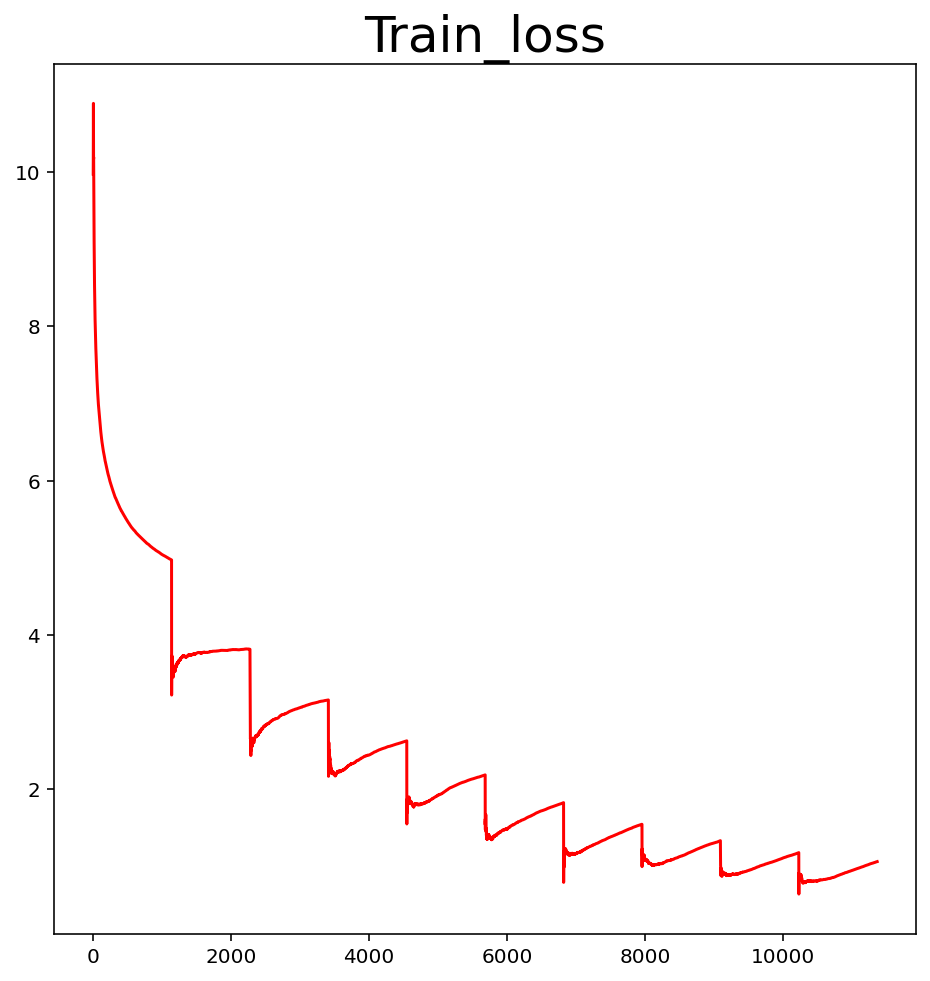

In [123]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.title('Train_loss',fontsize = 25)
plt.plot(train_loss, color = 'r')

---
# 5. 시각화
---

In [137]:
# Attention 시각화 함수

def visualize_attention(src, tgt, enc_attns, dec_attns, dec_enc_attns):
    def draw(data, ax, x="auto", y="auto"):
        import seaborn
        seaborn.heatmap(data, 
                        square=True,
                        vmin=0.0, vmax=1.0, 
                        cbar=False, ax=ax,
                        xticklabels=x,
                        yticklabels=y)
        
    for layer in range(0, 2, 1):
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        print("Encoder Layer", layer + 1)
        for h in range(4):
            draw(enc_attns[layer][0, h, :len(src), :len(src)], axs[h], src, src)
        plt.show()
        
    for layer in range(0, 2, 1):
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        print("Decoder Self Layer", layer+1)
        for h in range(4):
            draw(dec_attns[layer][0, h, :len(tgt), :len(tgt)], axs[h], tgt, tgt)
        plt.show()

        print("Decoder Src Layer", layer+1)
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        for h in range(4):
            draw(dec_enc_attns[layer][0, h, :len(tgt), :len(src)], axs[h], src, tgt)
        plt.show()

In [125]:
# 번역 생성 함수

def evaluate(sentence, model, src_tokenizer, tgt_tokenizer):
    sentence = preprocess_sentence(sentence)

    pieces = src_tokenizer.encode_as_pieces(sentence)
    tokens = src_tokenizer.encode_as_ids(sentence)

    _input = tf.keras.preprocessing.sequence.pad_sequences([tokens],
                                                           maxlen=enc_train.shape[-1],
                                                           padding='post')
    
    ids = []
    output = tf.expand_dims([tgt_tokenizer.bos_id()], 0)
    for i in range(dec_train.shape[-1]):
        enc_padding_mask, combined_mask, dec_padding_mask = \
        generate_masks(_input, output)

        predictions, enc_attns, dec_attns, dec_enc_attns =\
        model(_input, 
              output,
              enc_padding_mask,
              combined_mask,
              dec_padding_mask)

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0, -1]).numpy().item()

        if tgt_tokenizer.eos_id() == predicted_id:
            result = tgt_tokenizer.decode_ids(ids)
            return pieces, result, enc_attns, dec_attns, dec_enc_attns

        ids.append(predicted_id)
        output = tf.concat([output, tf.expand_dims([predicted_id], 0)], axis=-1)

    result = tgt_tokenizer.decode_ids(ids)

    return pieces, result, enc_attns, dec_attns, dec_enc_attns

In [126]:
# 번역 생성 및 Attention 시각화 결합

def translate(sentence, model, src_tokenizer, tgt_tokenizer, plot_attention=False):
    pieces, result, enc_attns, dec_attns, dec_enc_attns = \
    evaluate(sentence, model, src_tokenizer, tgt_tokenizer)
    
    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

    if plot_attention:
        visualize_attention(pieces, result.split(), enc_attns, dec_attns, dec_enc_attns)

In [130]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)


'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [131]:
import warnings
warnings.filterwarnings('ignore')

In [138]:
examples = ["오바마는 대통령이다.",
            "시민들은 도시 속에 산다.",
            "커피는 필요 없다.",
            "일곱 명의 사망자가 발생했다."]

for example in examples:
    translate(example, transformer, ko_tokenizer, en_tokenizer,  plot_attention=False)

Input: 오바마는 대통령이다.
Predicted translation: obama is in his country .
Input: 시민들은 도시 속에 산다.
Predicted translation: they built up in cities .
Input: 커피는 필요 없다.
Predicted translation: even need of coffee trade .
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: the death toll from the dead .


이전 seq2seq 보다는 예시 문장에 가까운 단어들로 번역을 하고는 있지만, 잘 번역되고 있지는 않다.

Input: 오바마는 대통령이다.
Predicted translation: obama is in his country .
Encoder Layer 1


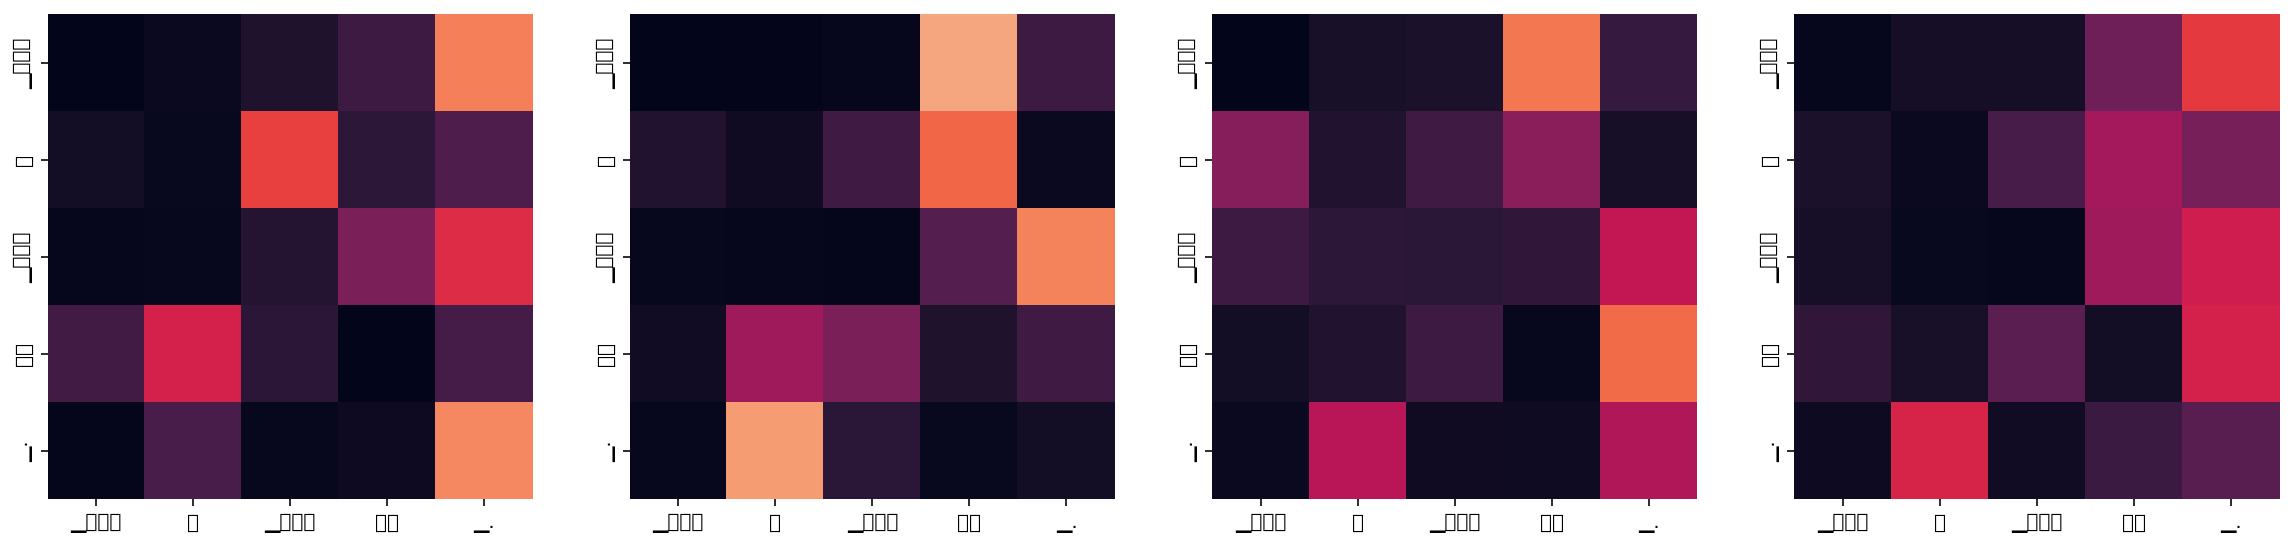

Encoder Layer 2


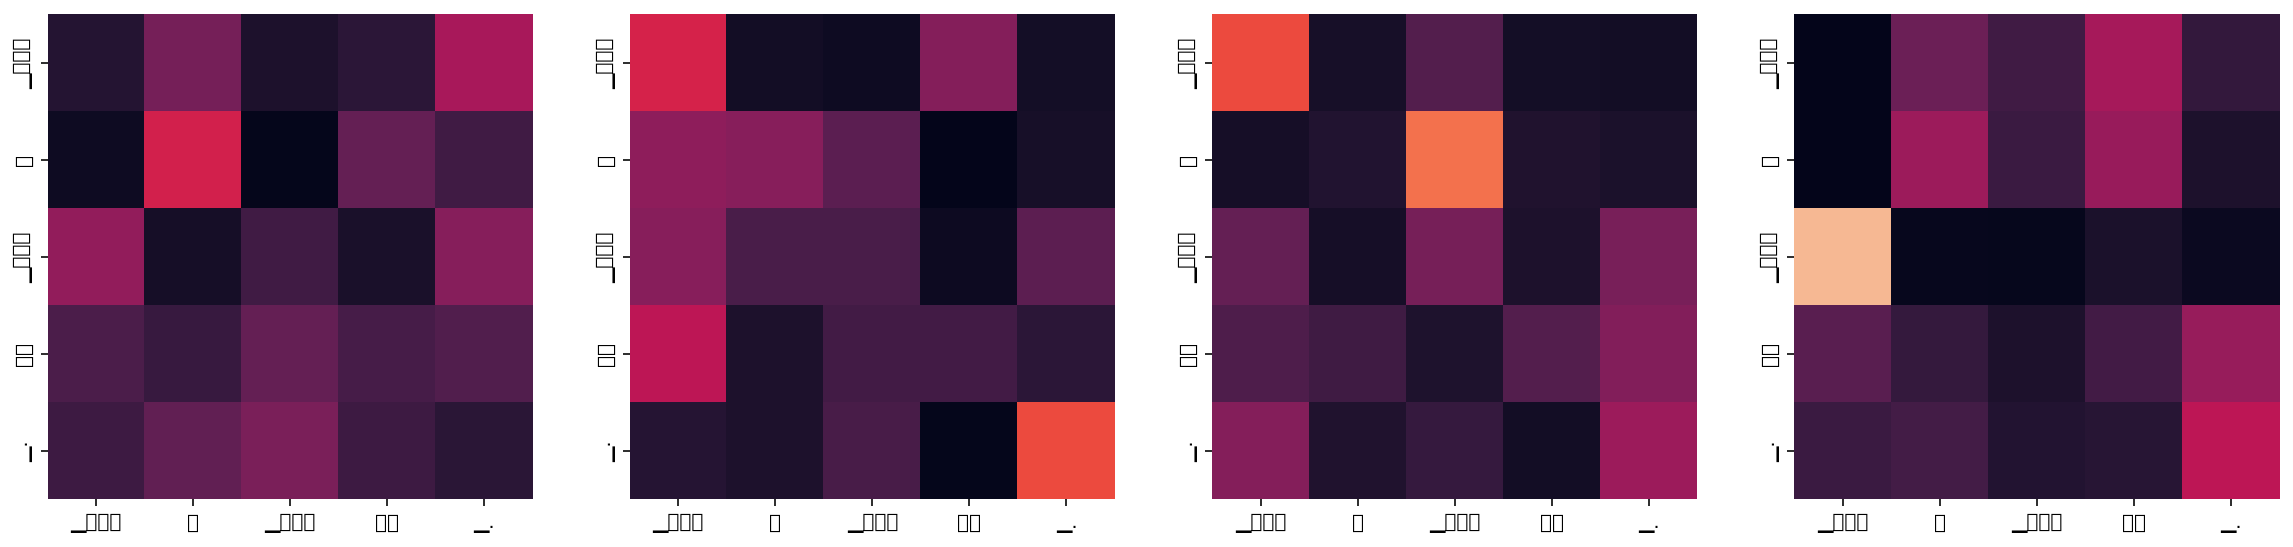

Decoder Self Layer 1


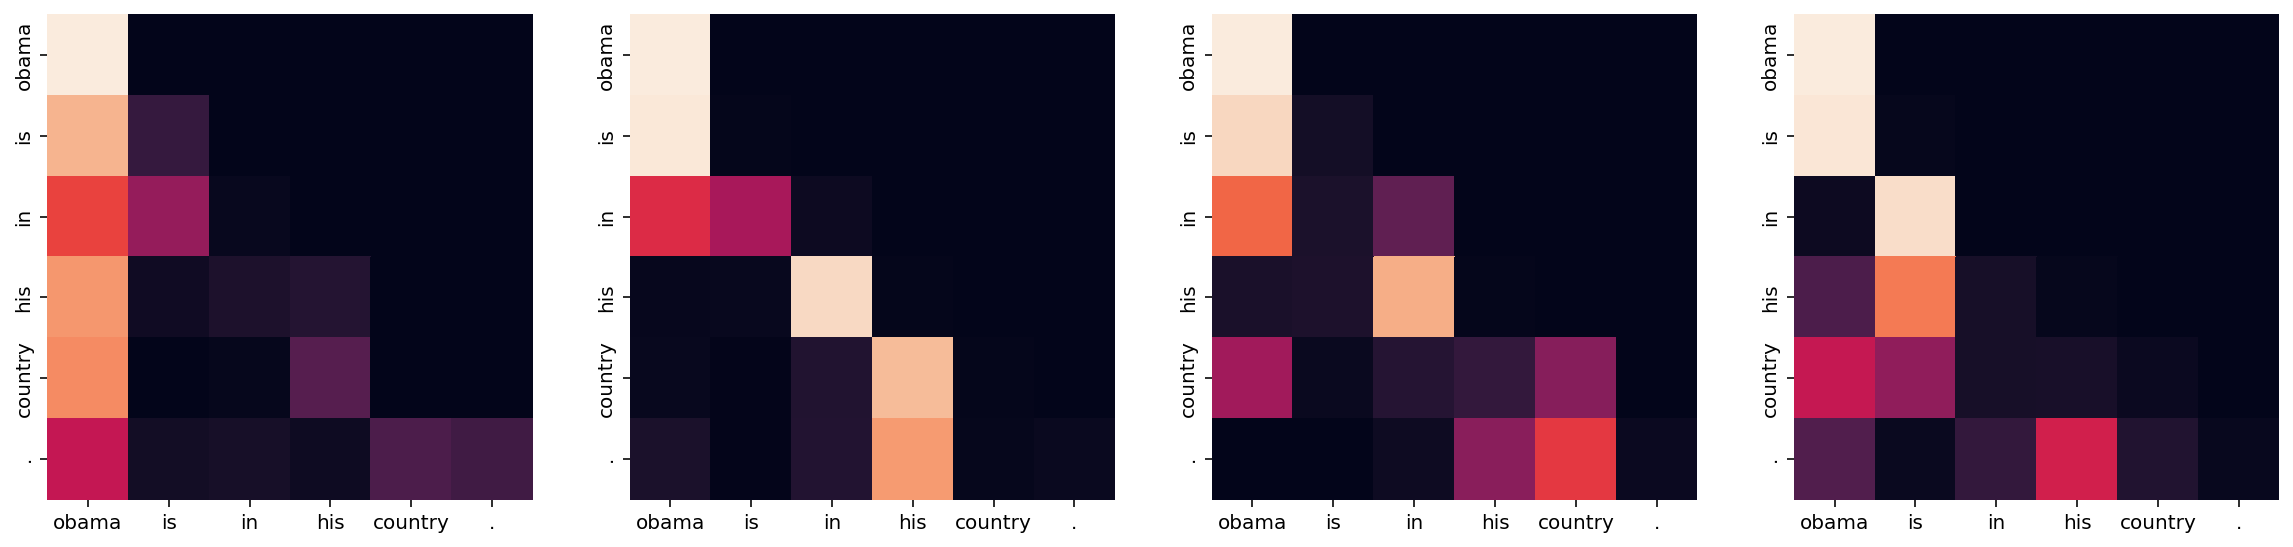

Decoder Src Layer 1


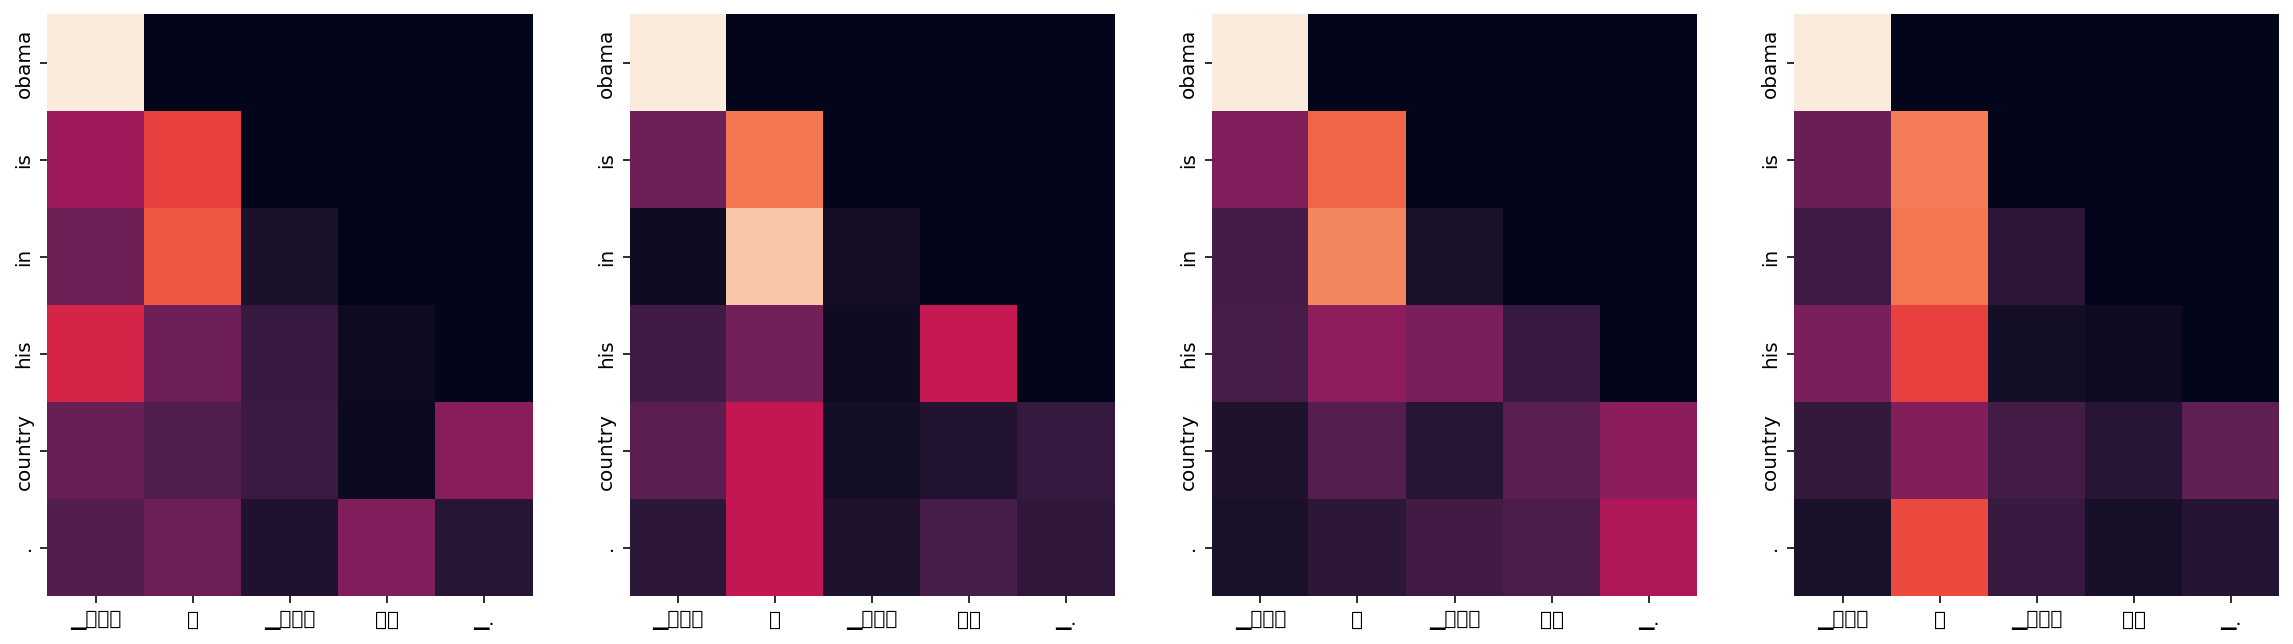

Decoder Self Layer 2


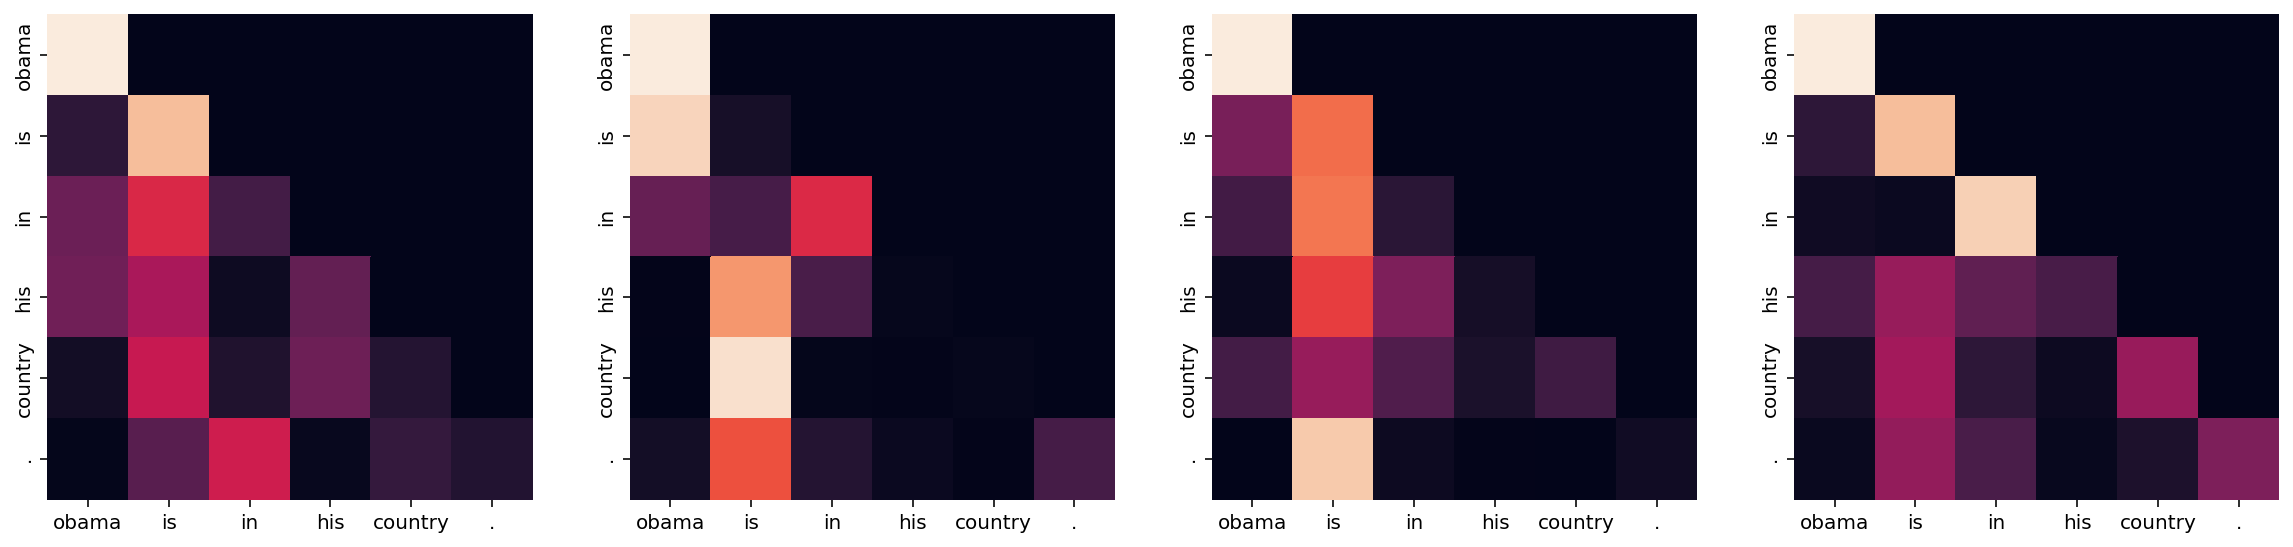

Decoder Src Layer 2


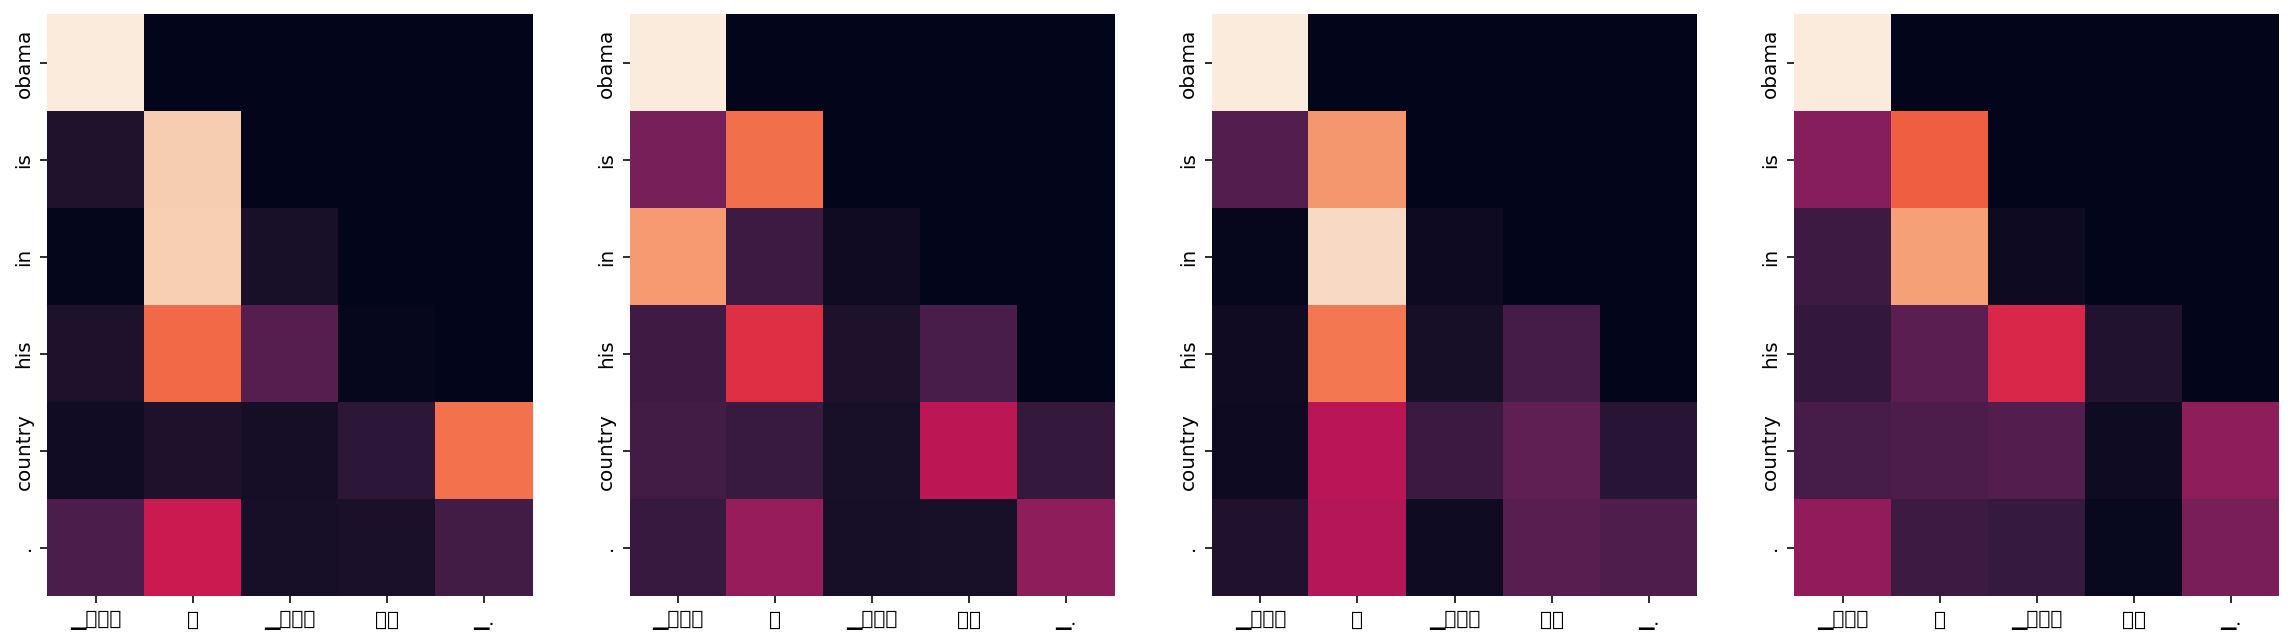

Input: 시민들은 도시 속에 산다.
Predicted translation: they built up in cities .
Encoder Layer 1


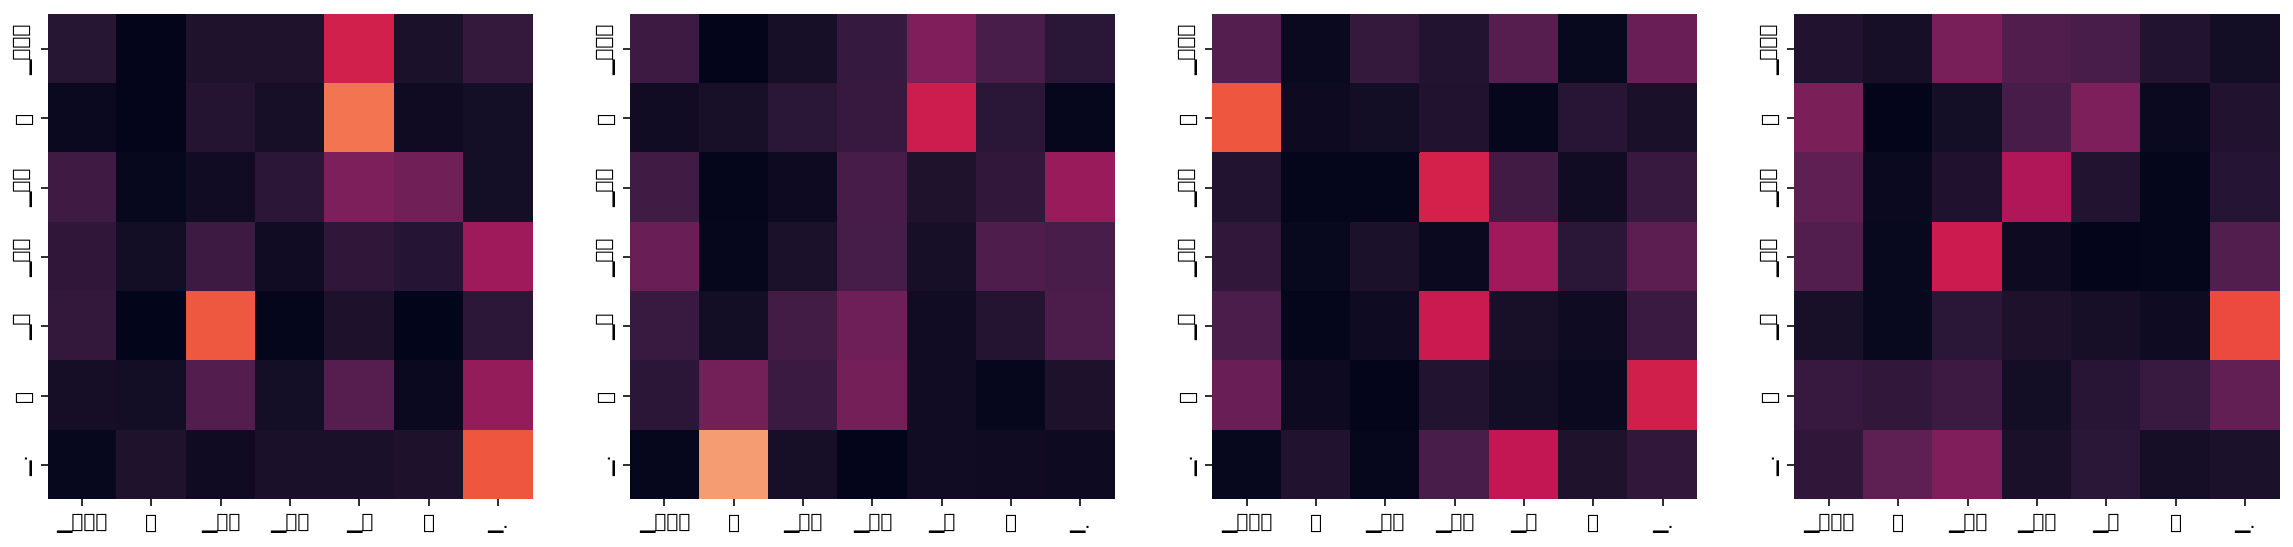

Encoder Layer 2


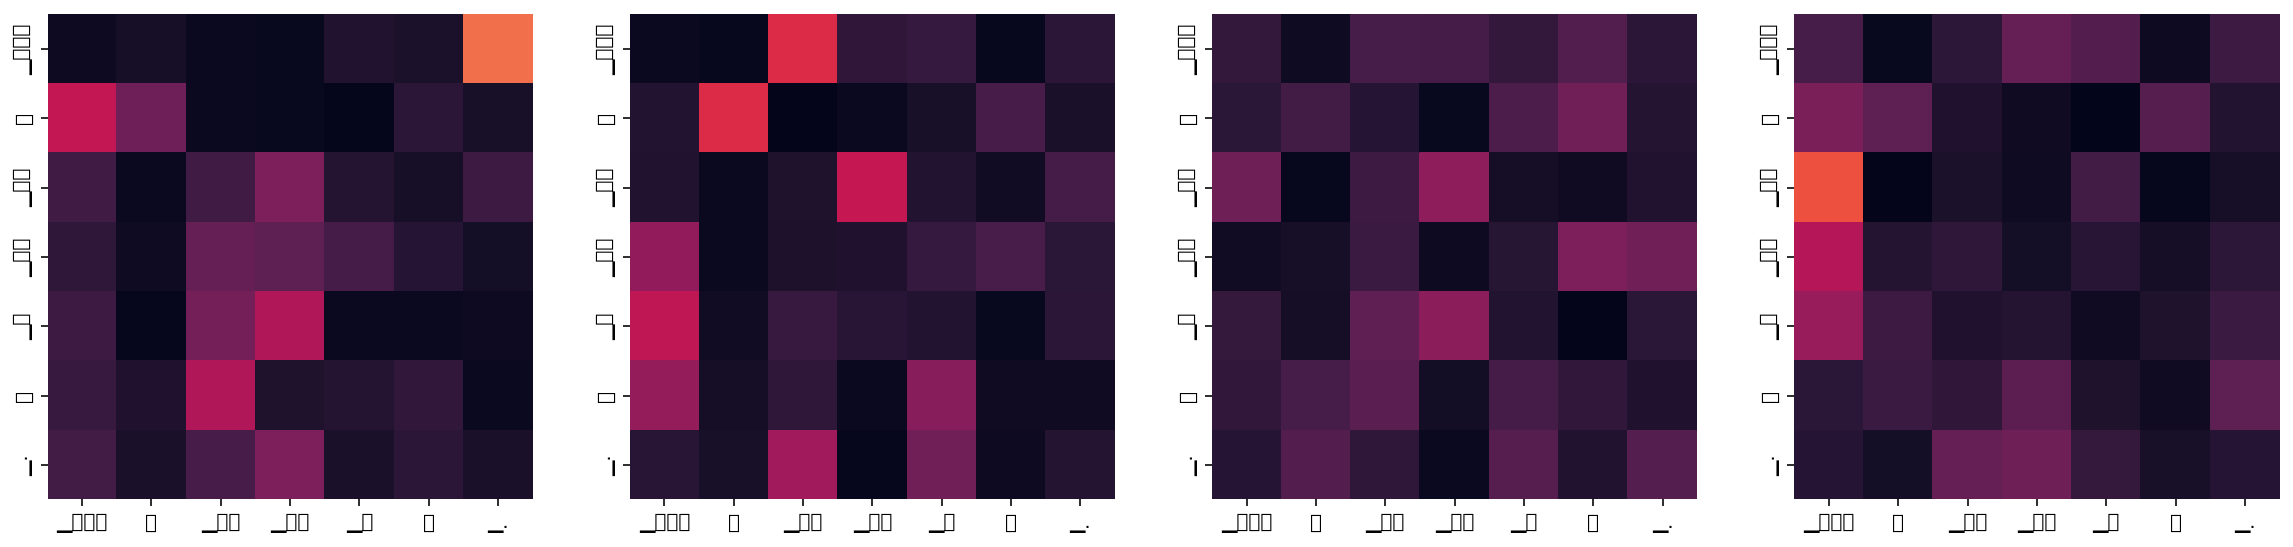

Decoder Self Layer 1


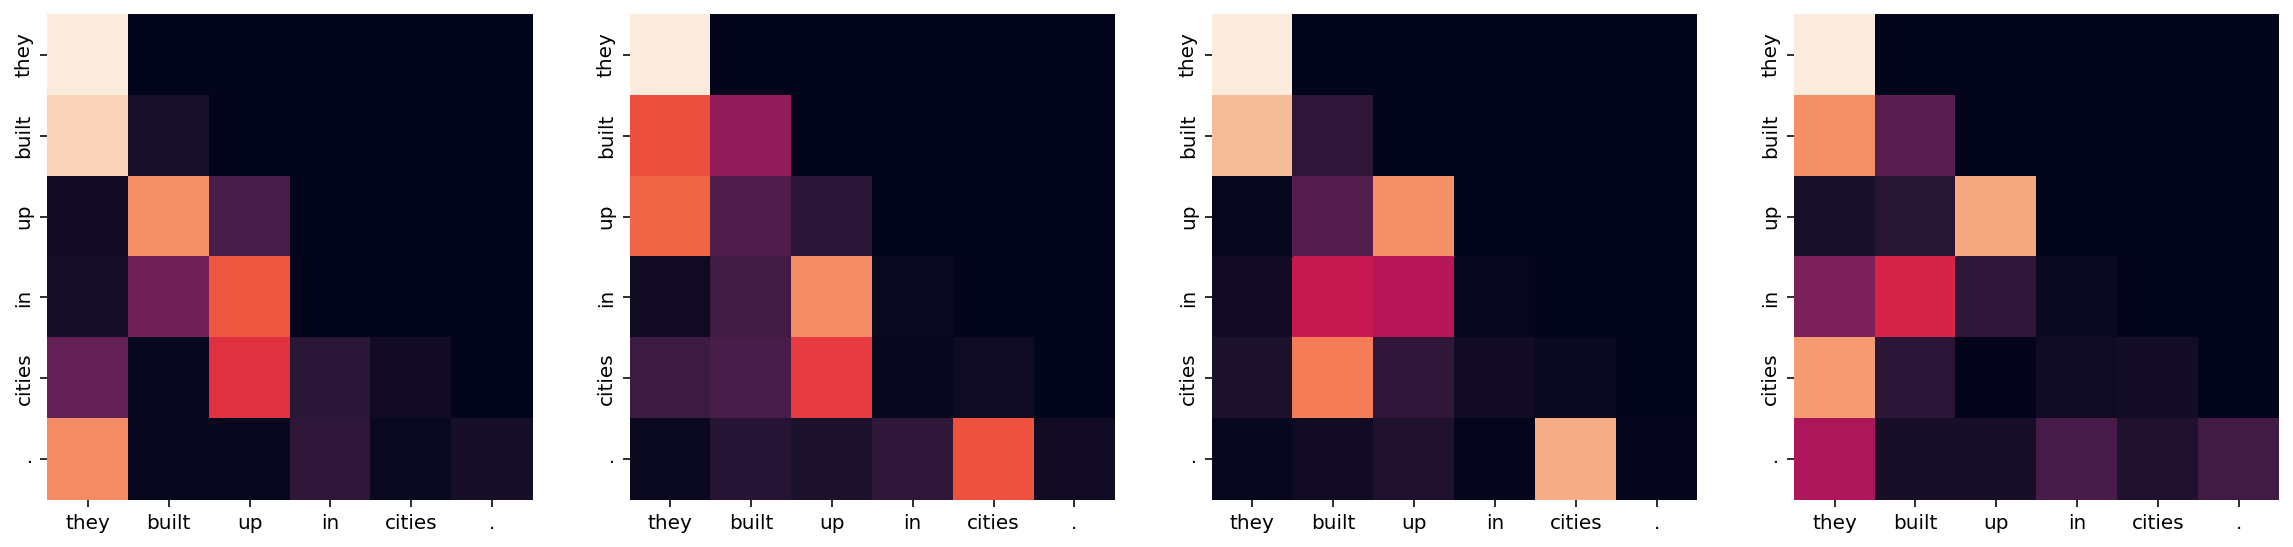

Decoder Src Layer 1


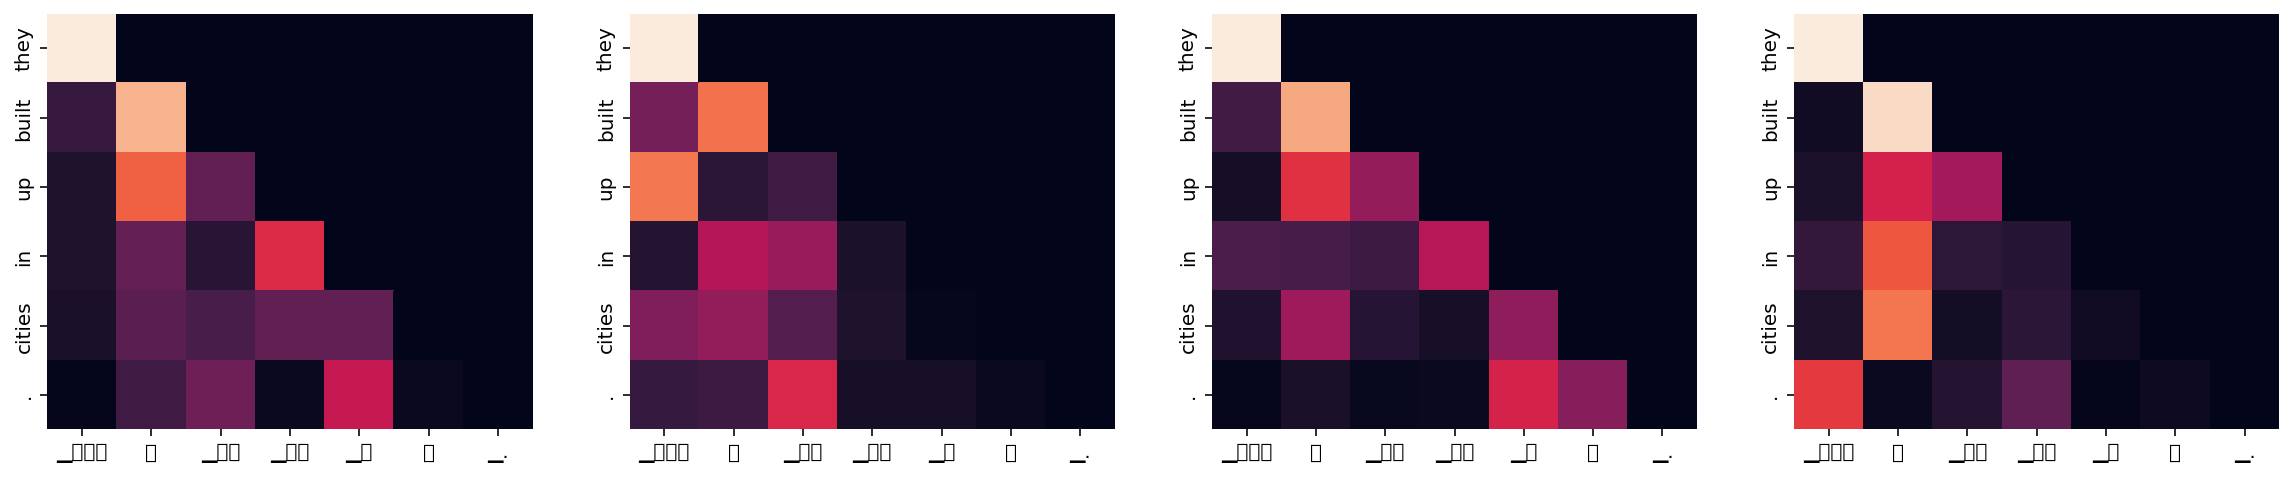

Decoder Self Layer 2


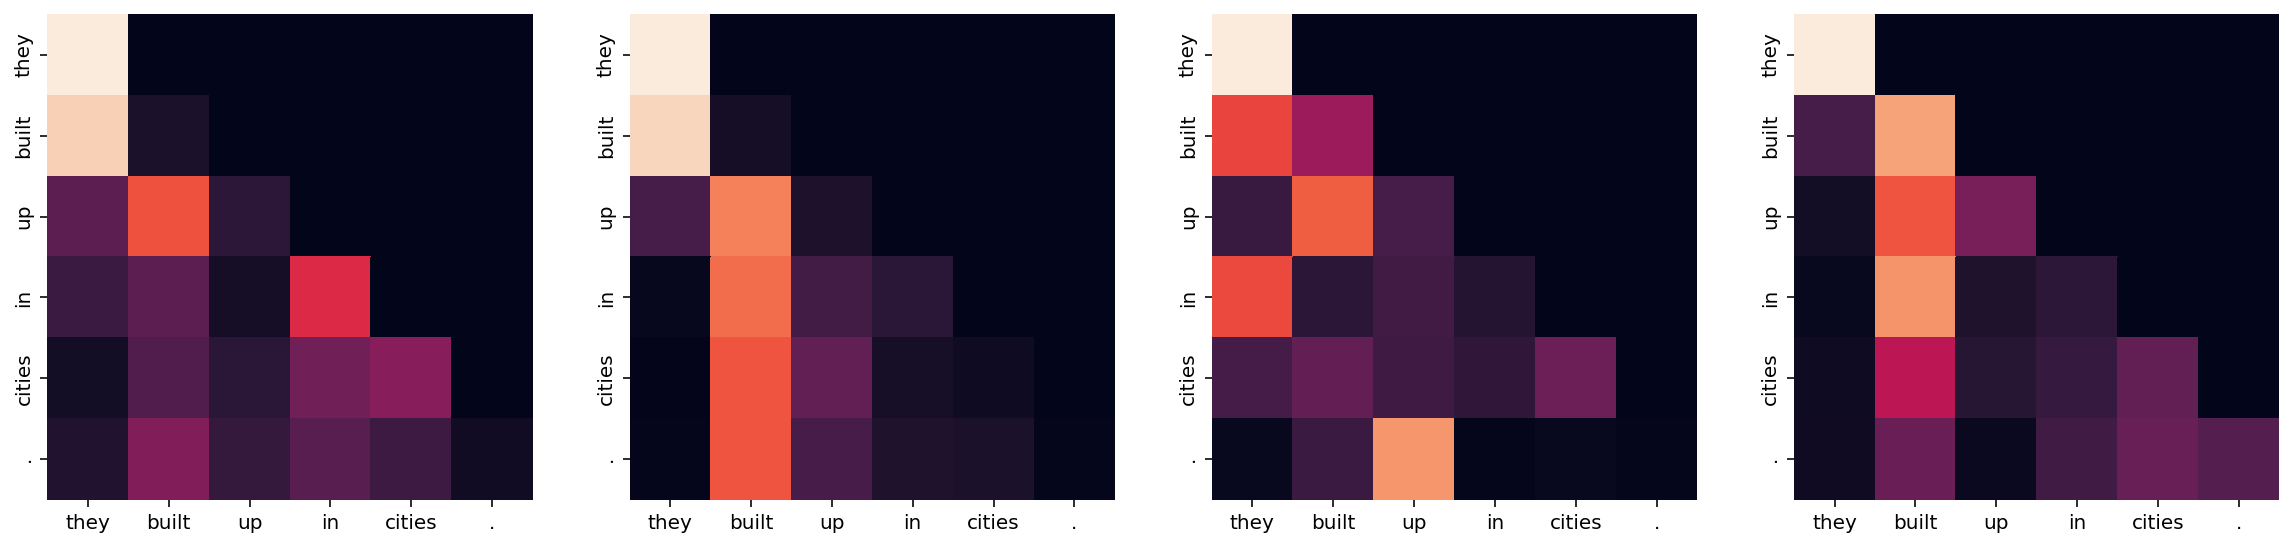

Decoder Src Layer 2


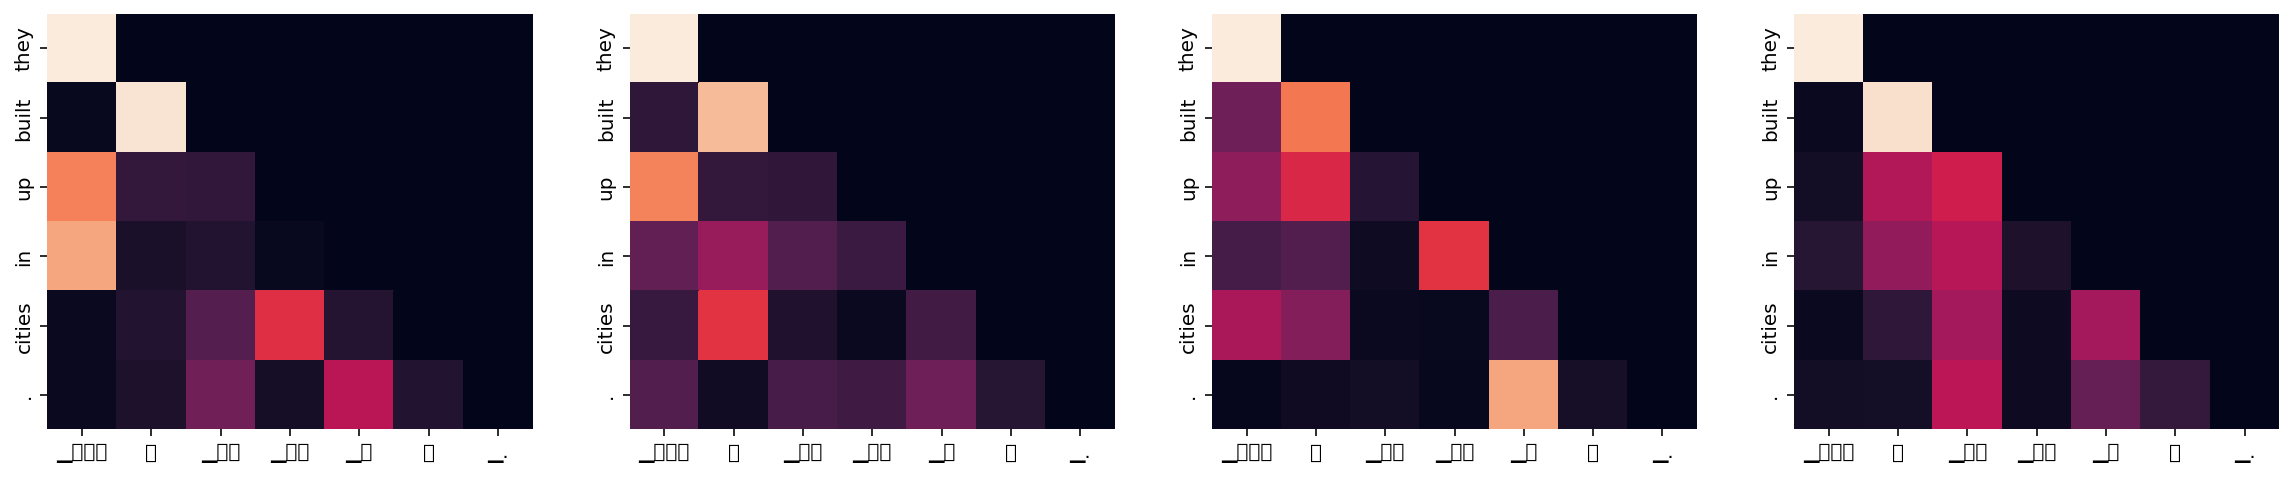

Input: 커피는 필요 없다.
Predicted translation: even need of coffee trade .
Encoder Layer 1


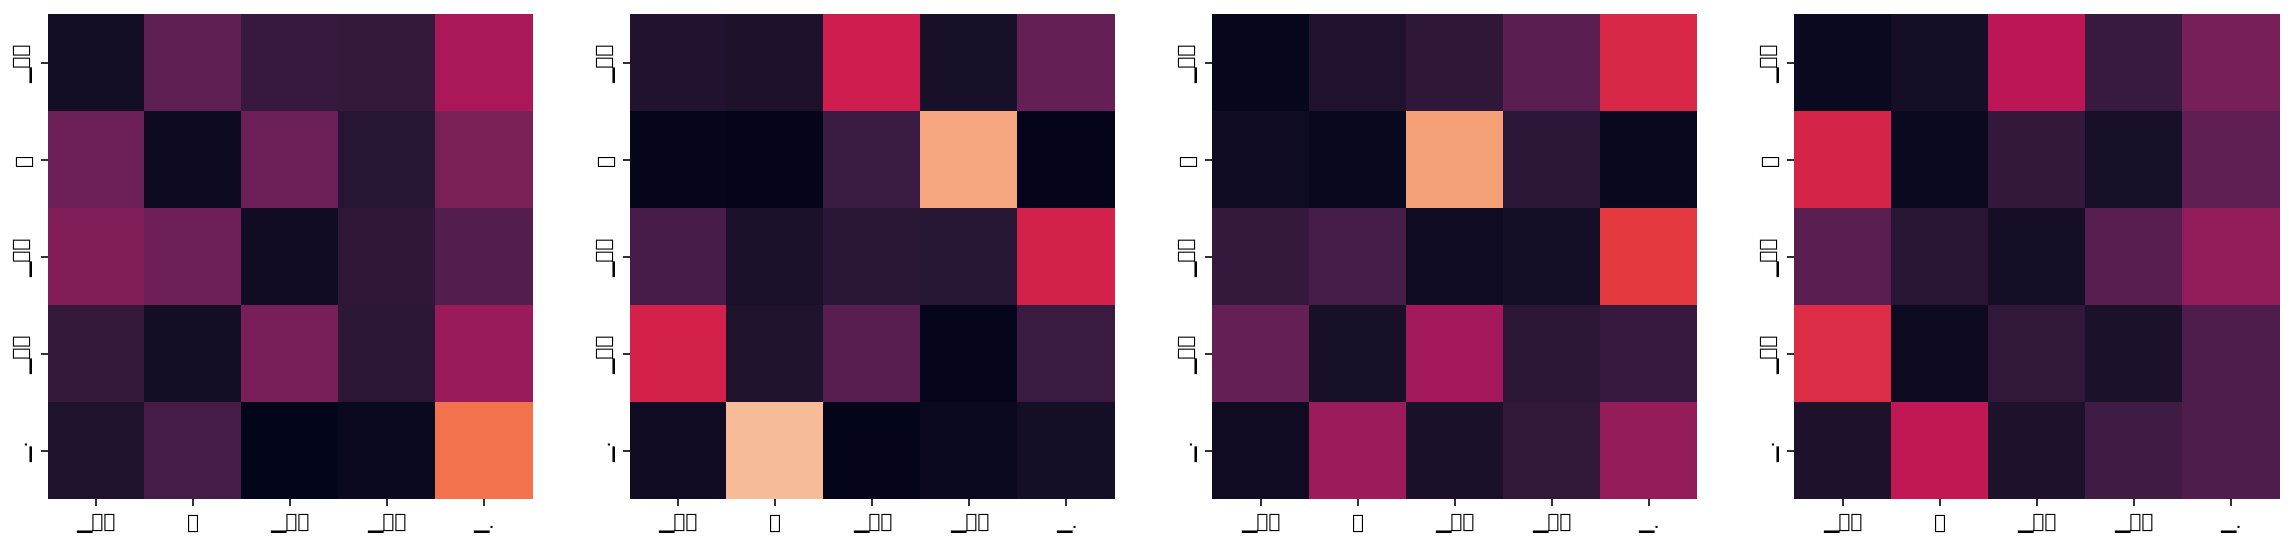

Encoder Layer 2


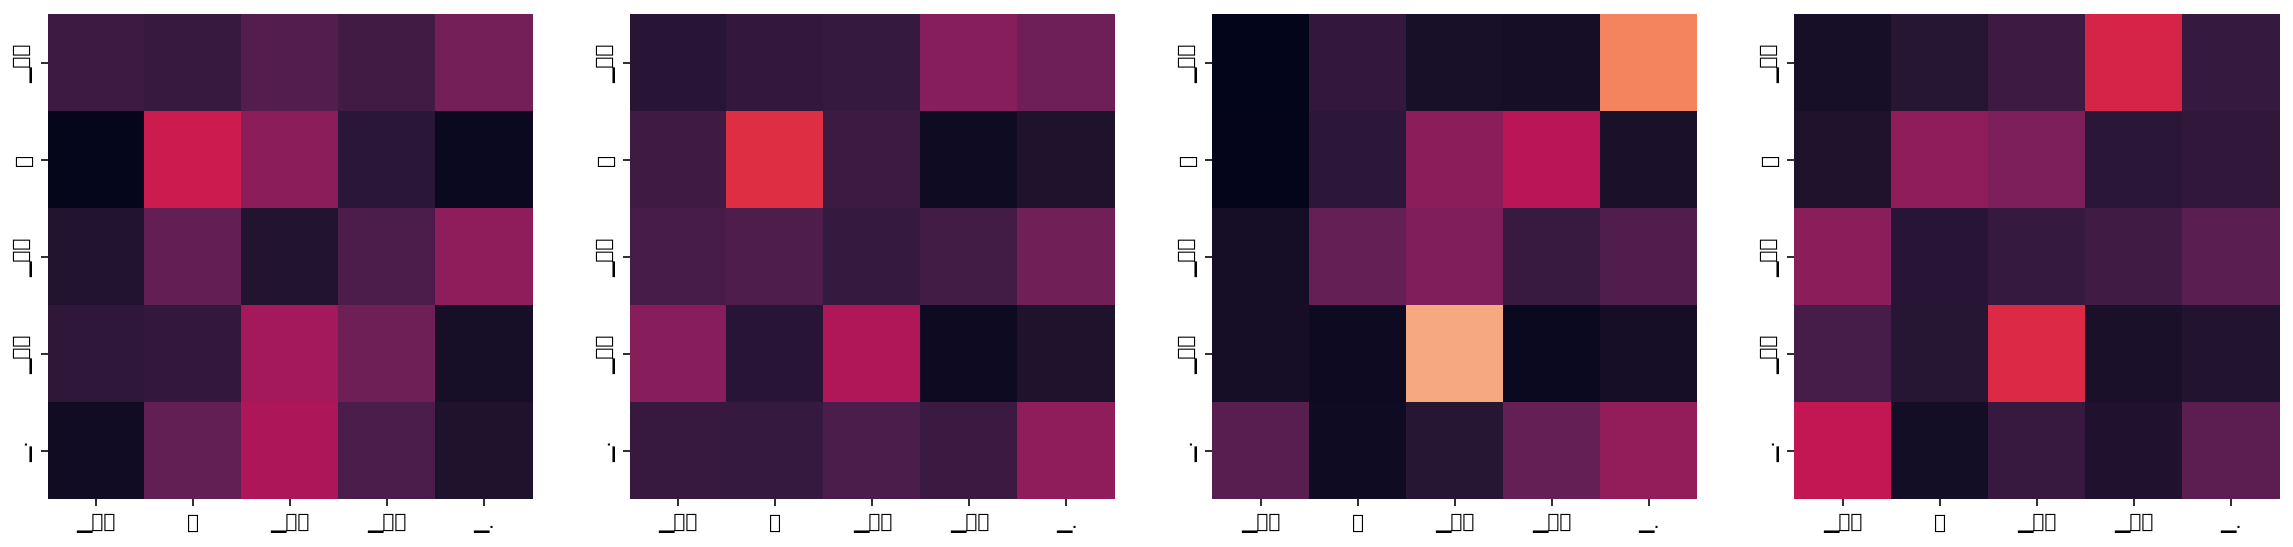

Decoder Self Layer 1


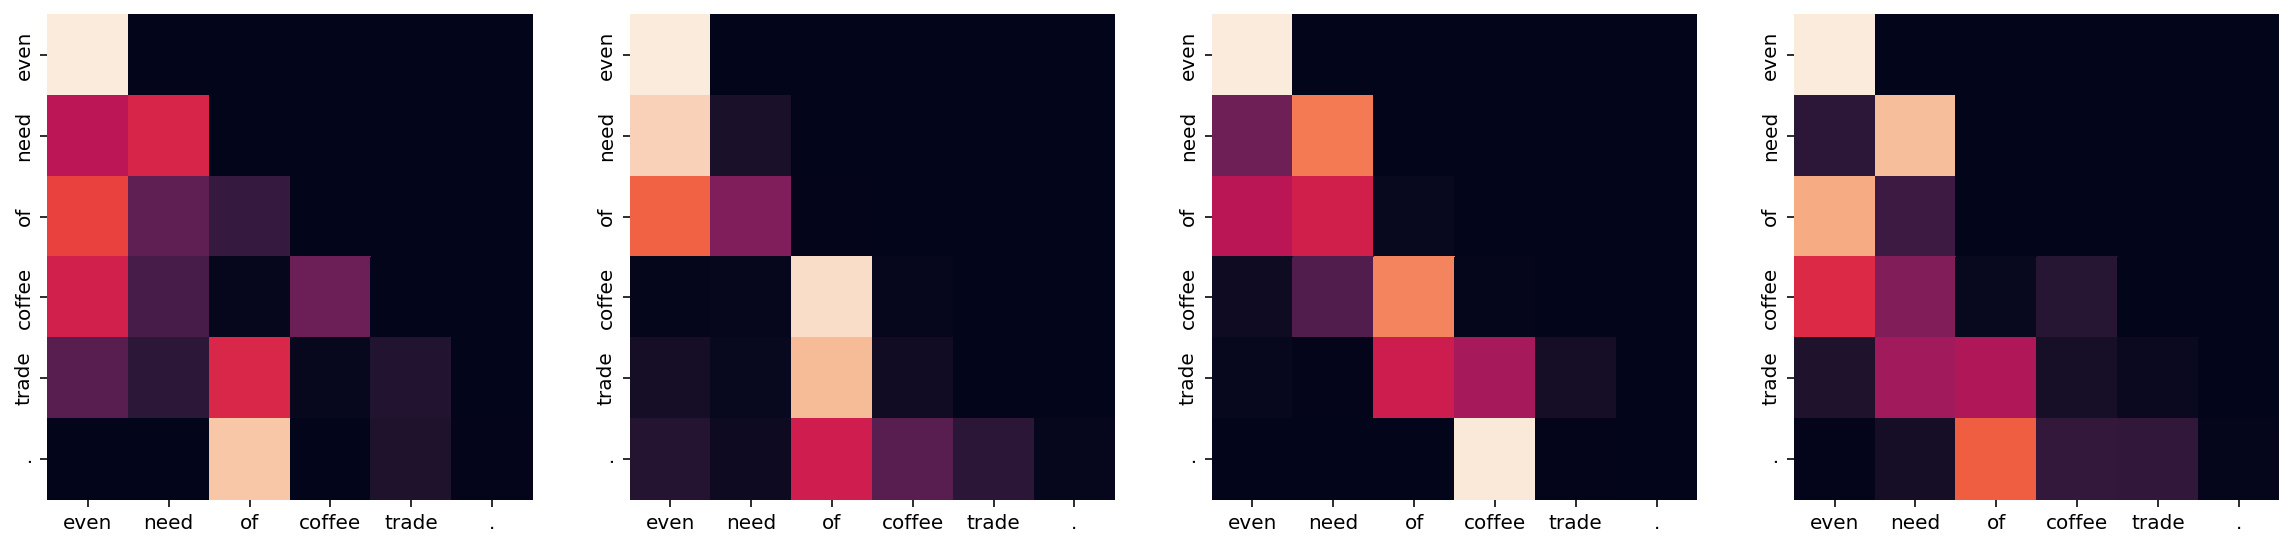

Decoder Src Layer 1


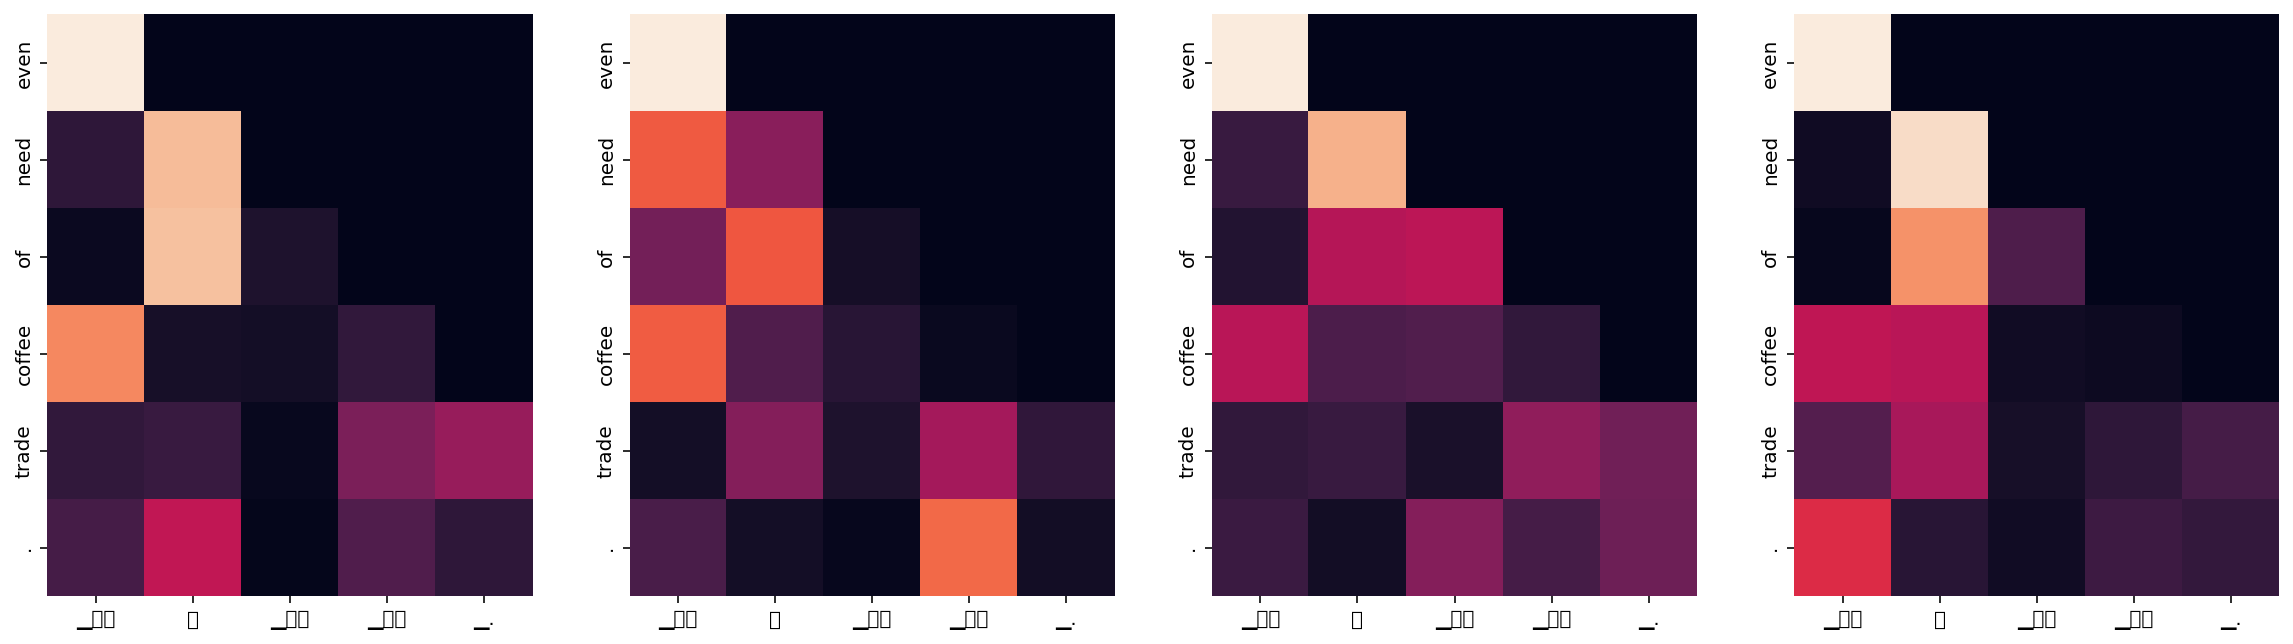

Decoder Self Layer 2


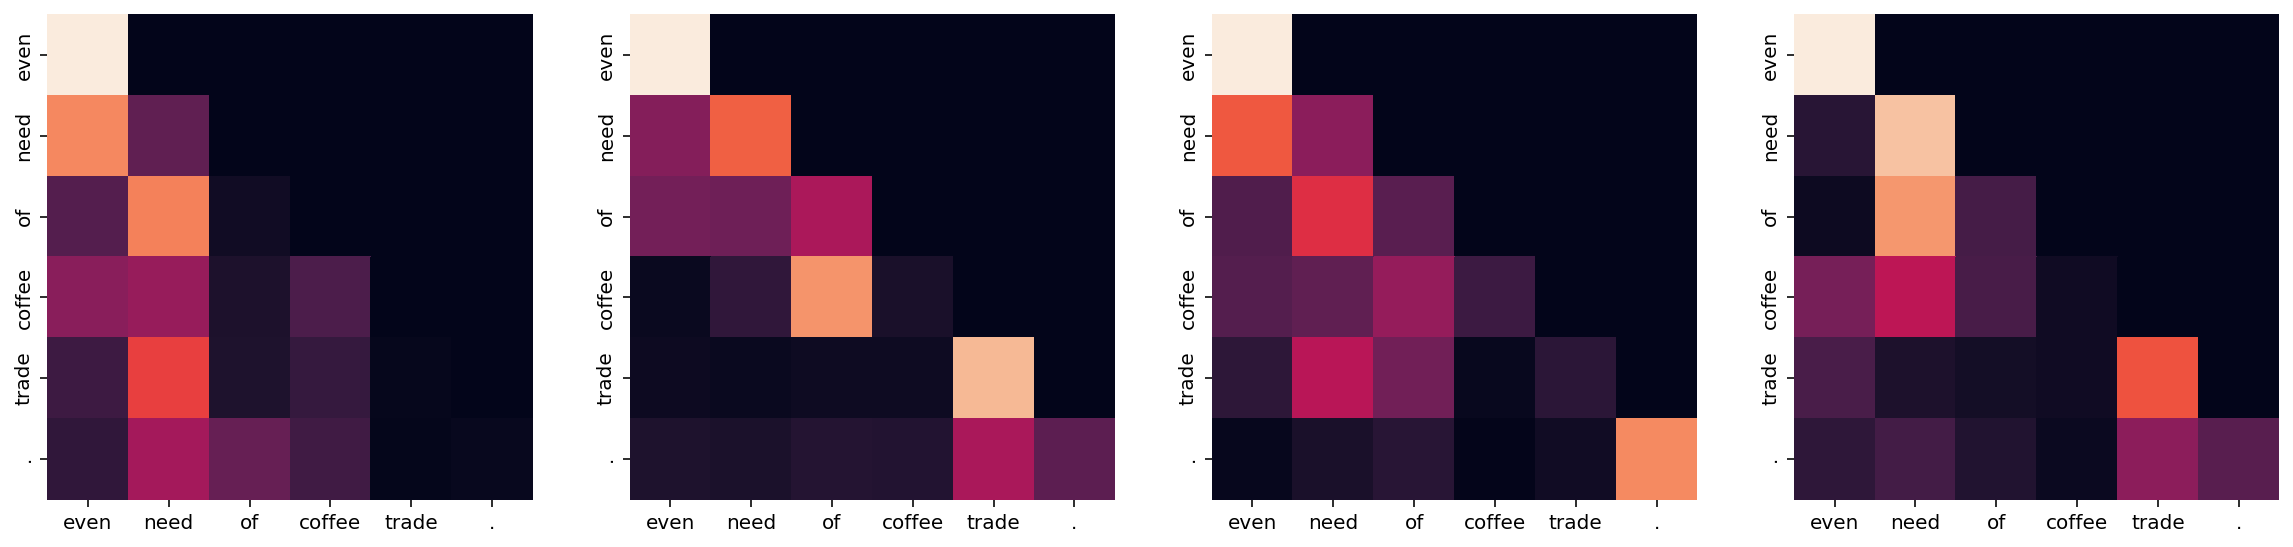

Decoder Src Layer 2


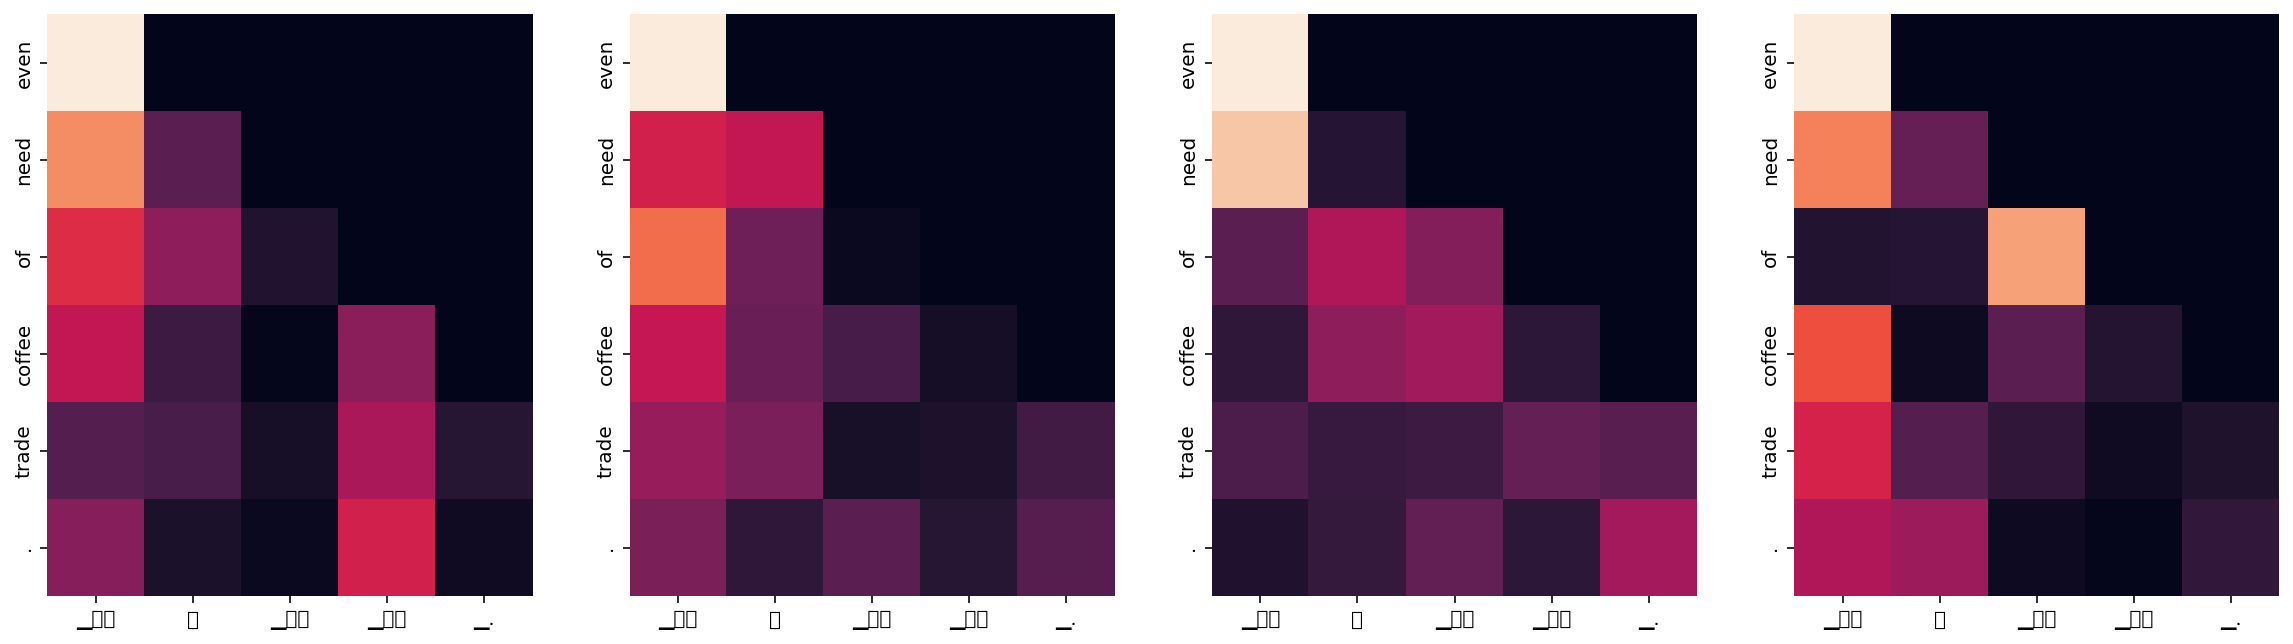

Input: 일곱 명의 사망자가 발생했다.
Predicted translation: the death toll from the dead .
Encoder Layer 1


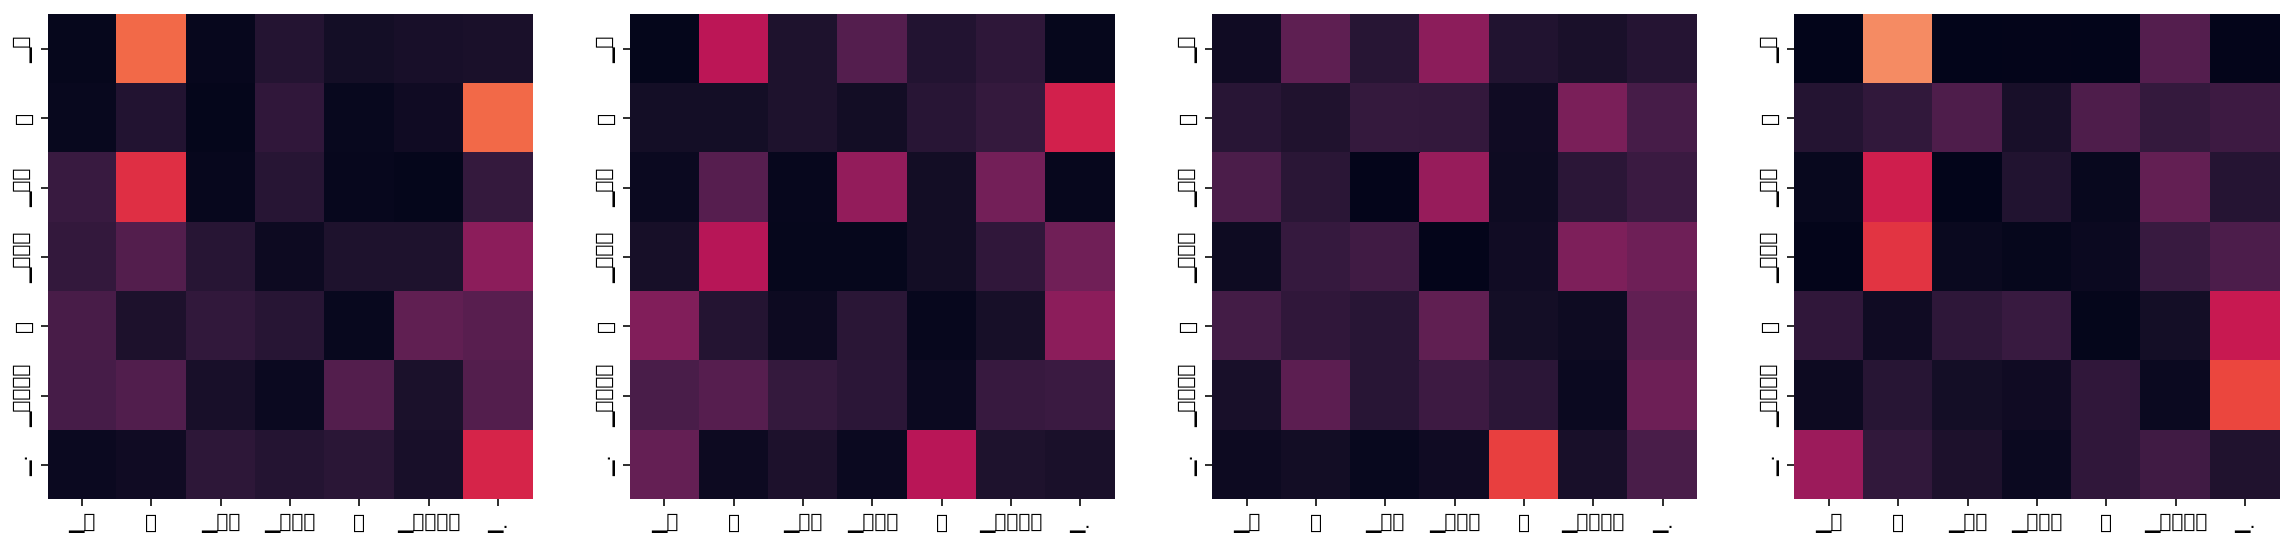

Encoder Layer 2


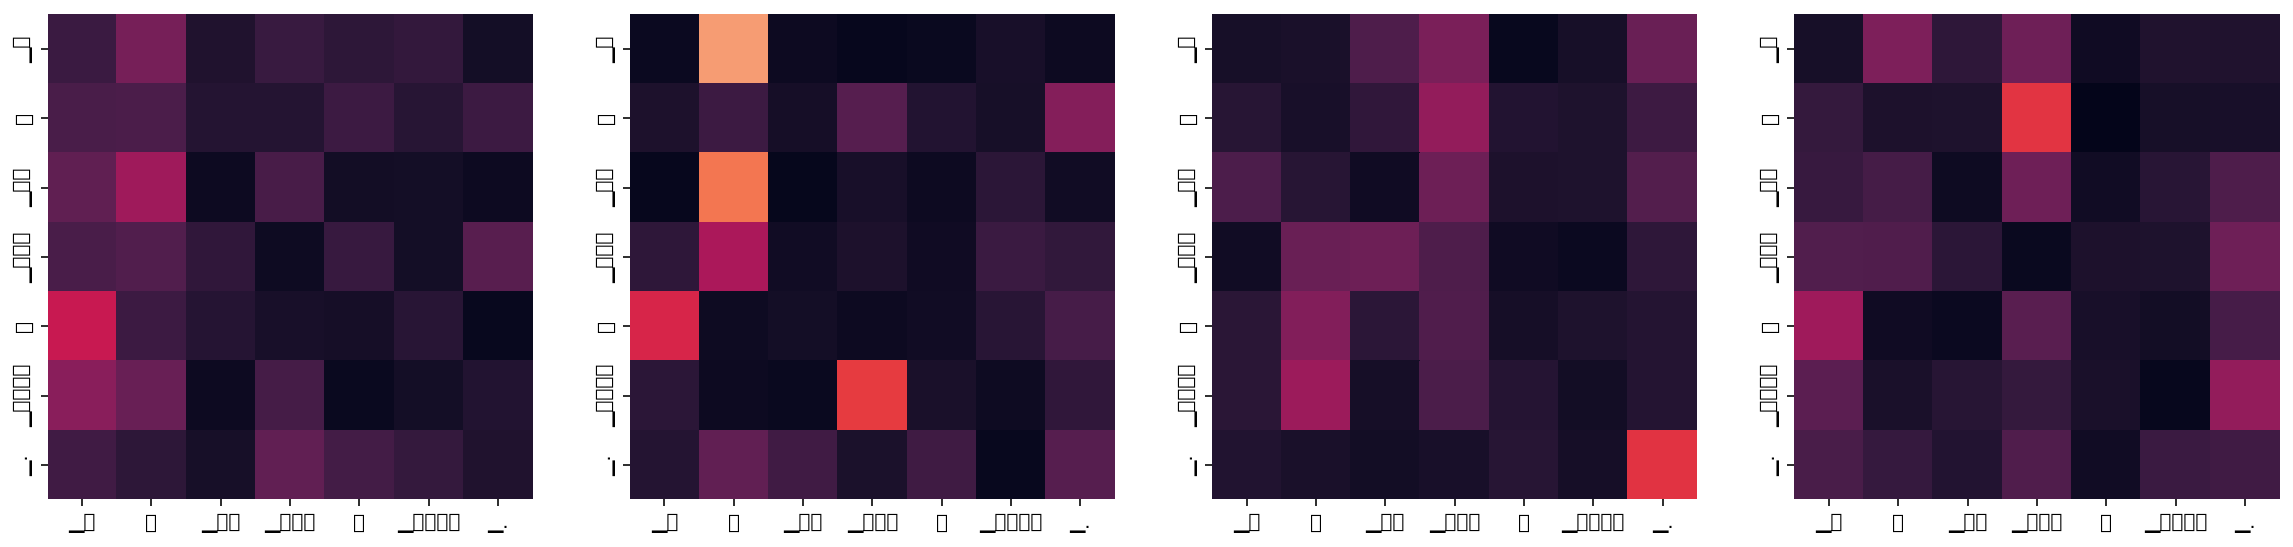

Decoder Self Layer 1


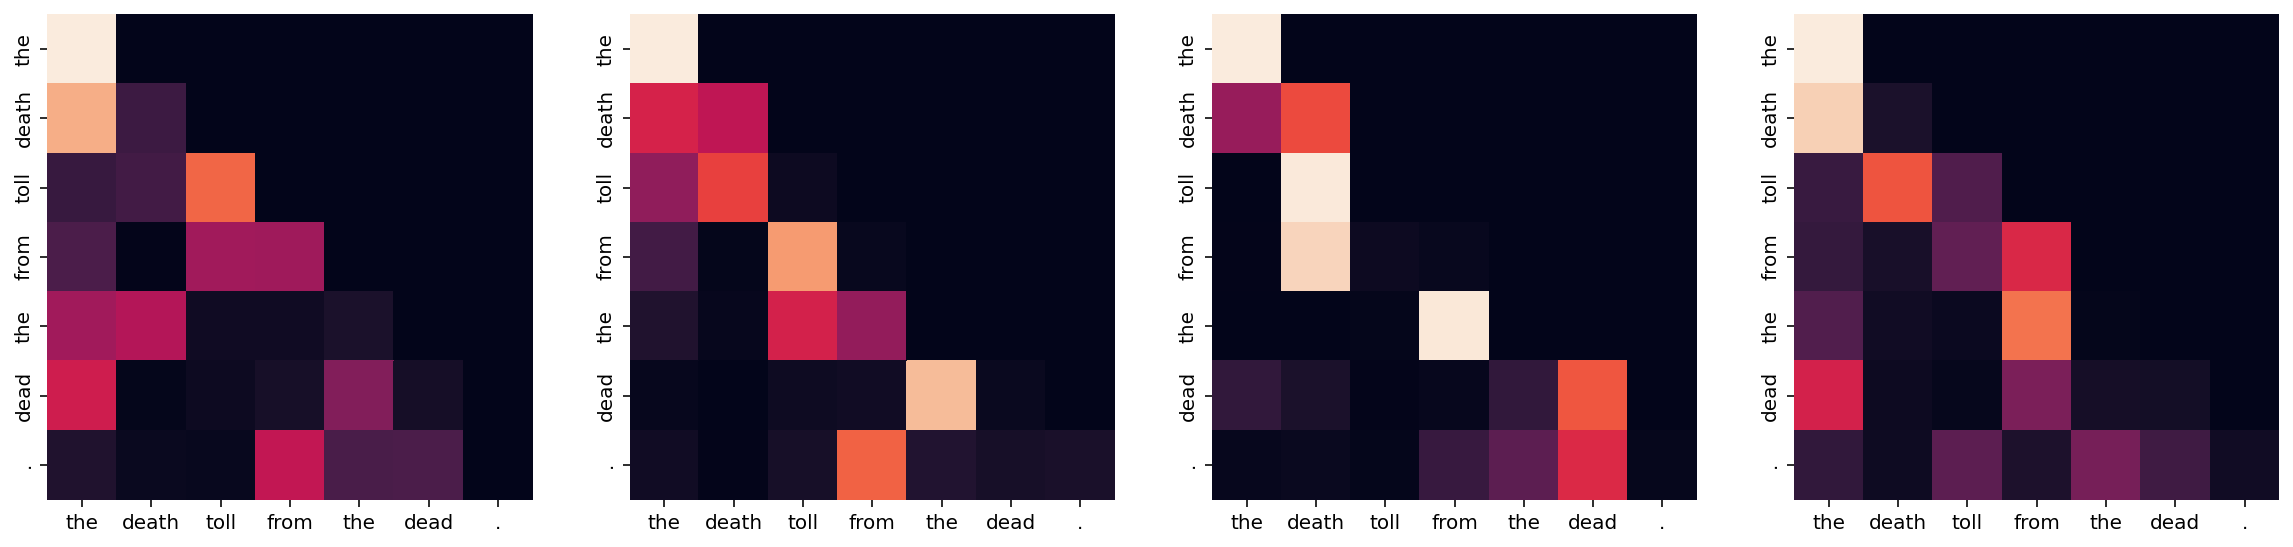

Decoder Src Layer 1


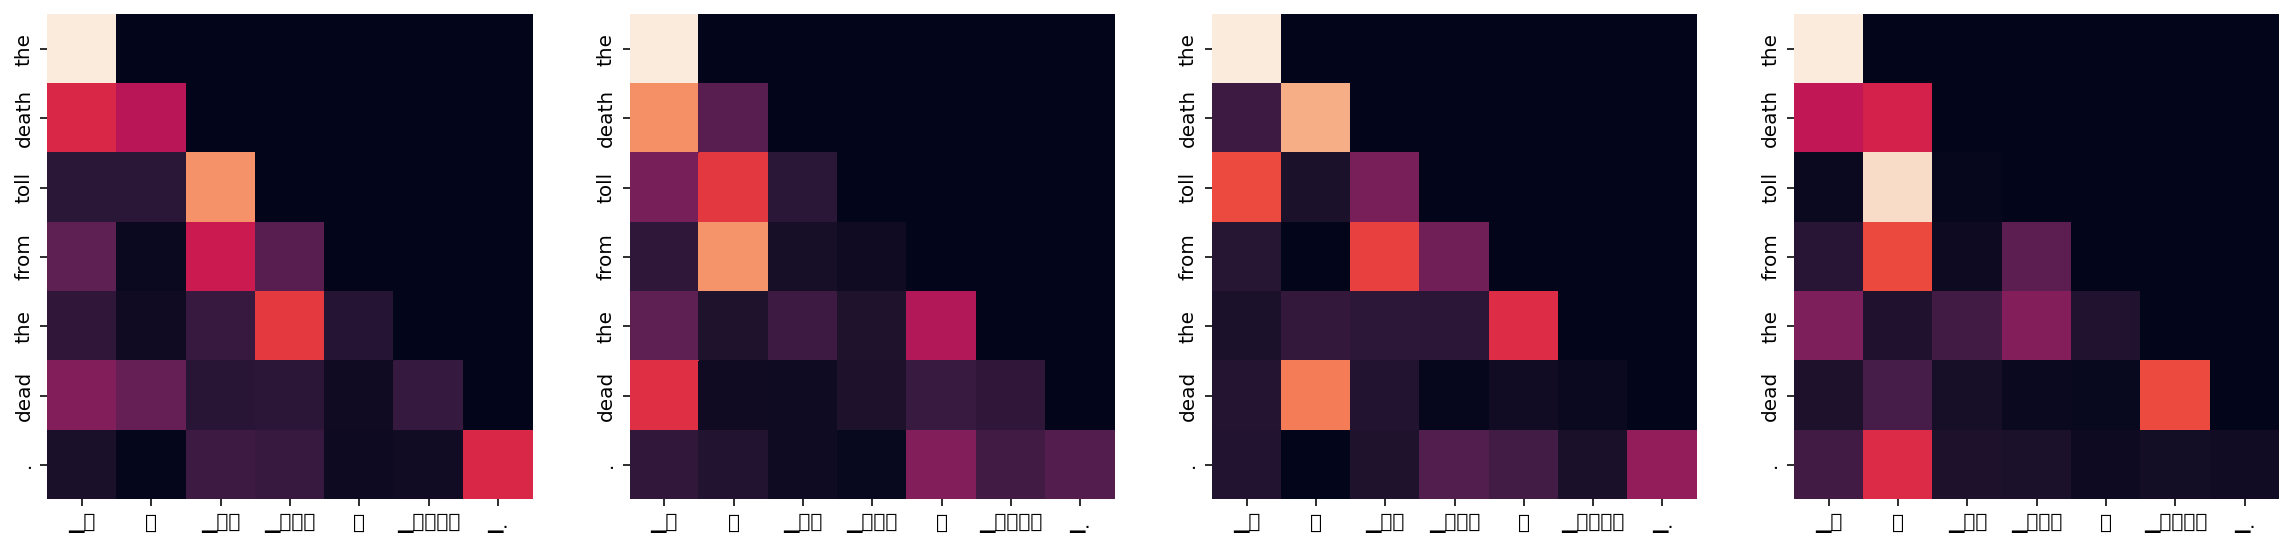

Decoder Self Layer 2


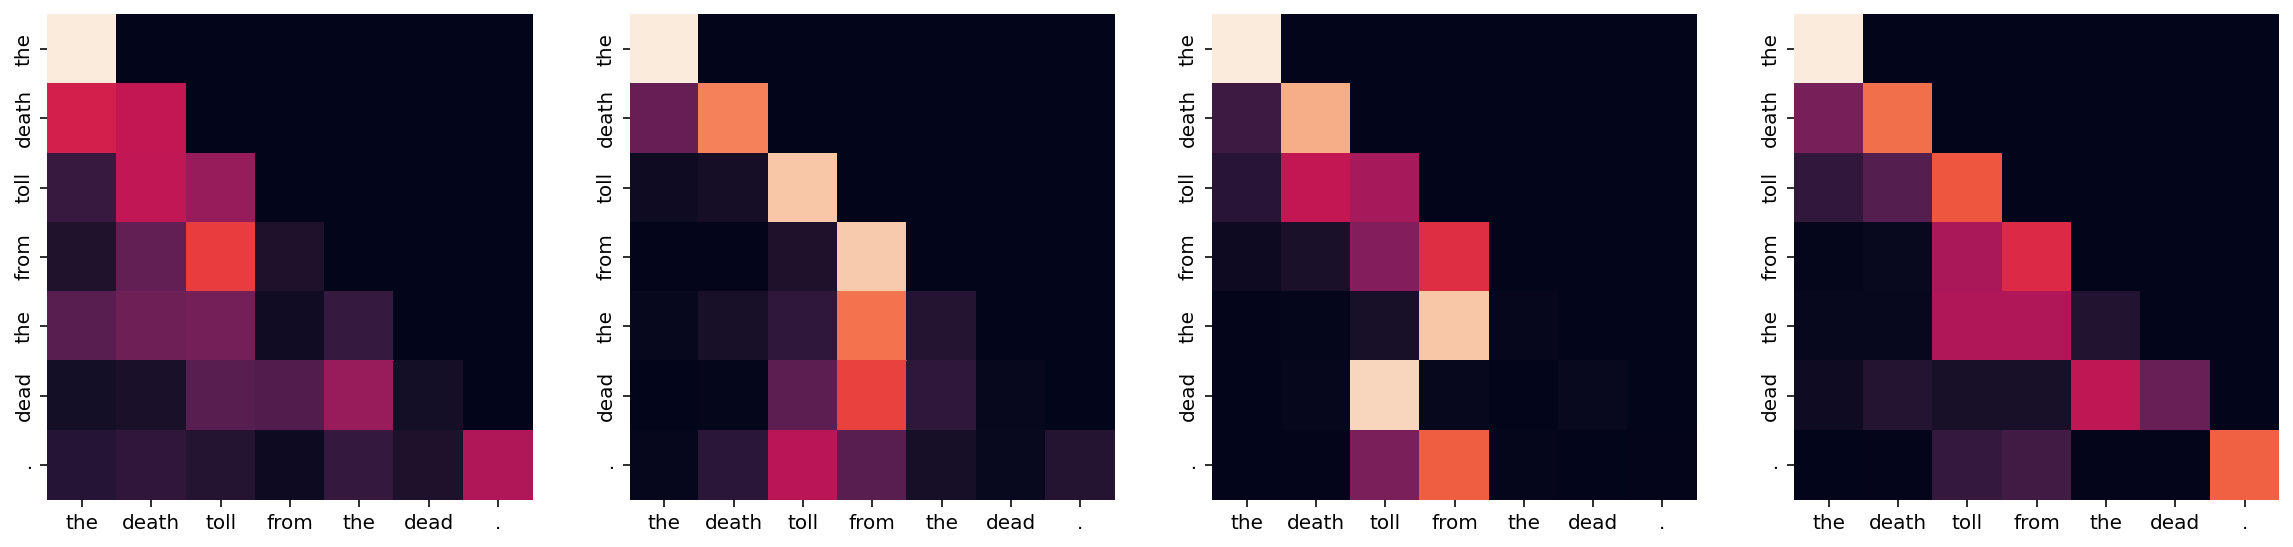

Decoder Src Layer 2


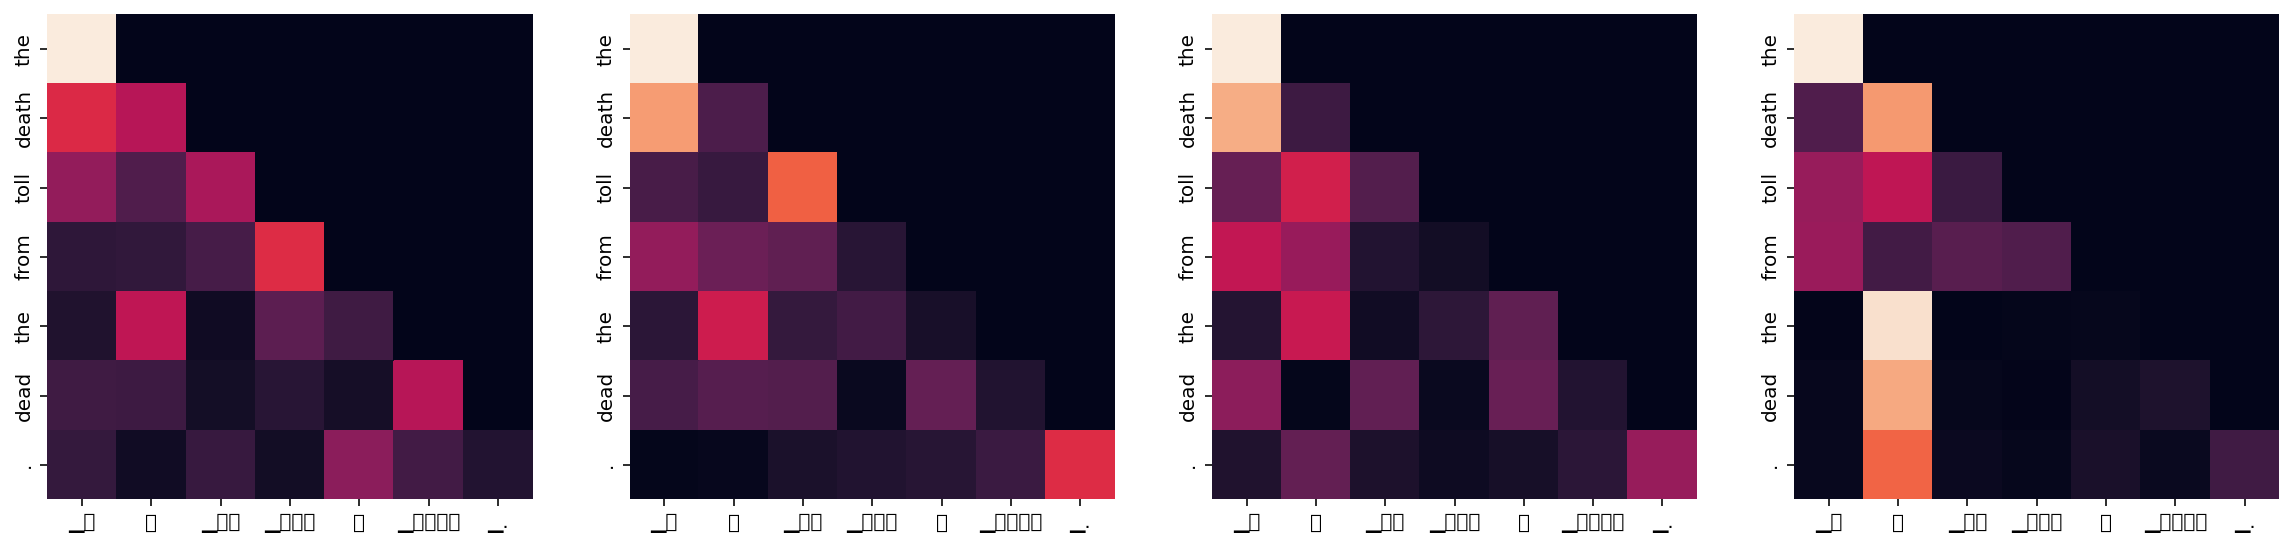

In [139]:
for example in examples:
    translate(example, transformer, ko_tokenizer, en_tokenizer,  plot_attention=True)

---
# 6. 값 변경해보기
----

---
### 6-1 epoch 늘려보기
---

- 기존 10회만 진행했던 epoch을 10회 더 추가해서 결과값을 확인해 보겠다.

In [140]:
# 학습
BATCH_SIZE = 64
EPOCHS = 10
train_loss = []

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss, enc_attns, dec_attns, dec_enc_attns = \
        train_step(enc_train[idx:idx+BATCH_SIZE],
                    dec_train[idx:idx+BATCH_SIZE],
                    transformer,
                    optimizer)

        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))
        train_loss.append((total_loss.numpy() / (batch + 1)))

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

In [141]:
for example in examples:
    translate(example, transformer, ko_tokenizer, en_tokenizer,  plot_attention=False)

Input: 오바마는 대통령이다.
Predicted translation: obama is the first man to be his father .
Input: 시민들은 도시 속에 산다.
Predicted translation: some feel the city grows in the cities of urban cities .
Input: 커피는 필요 없다.
Predicted translation: if the baby grows need to be need grade glasses suddenly .
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: a seven team from seven foreign workers


이전 보다는 단어 하나하나씩 매칭되는 것이 늘어난 것 처럼 보이나  
3번째 문장의 커피에 대한 내용이 없어지고 다른 것으로 변경 되었다.

---
### 6-2 epoch 늘려보기
---

- epoch을 10회 더 추가해서 결과값을 확인해 보겠다.

In [159]:
# 학습
BATCH_SIZE = 64
EPOCHS = 10
train_loss = []

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss, enc_attns, dec_attns, dec_enc_attns = \
        train_step(enc_train[idx:idx+BATCH_SIZE],
                    dec_train[idx:idx+BATCH_SIZE],
                    transformer,
                    optimizer)

        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))
        train_loss.append((total_loss.numpy() / (batch + 1)))

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

In [160]:
for example in examples:
    translate(example, transformer, ko_tokenizer, en_tokenizer,  plot_attention=False)

Input: 오바마는 대통령이다.
Predicted translation: obama is going to be the second president .
Input: 시민들은 도시 속에 산다.
Predicted translation: they took refuge in the city s cities .
Input: 커피는 필요 없다.
Predicted translation: de coffee needs a half hour
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: seven victims were seen taking the seventh death toll .


20번 돌린 것 보다는 성능이 조금 더 양호해 진 것 같으나  
여전히 마음에 들지는 않는다

---
### 6-3 Layer 늘려보기
---

- 기존 Layer 2 -> 4 로 변경 

In [162]:
transformer2 = Transformer(n_layers=4,
                          d_model=512,
                          n_heads=8,
                          d_ff=2048,
                          dropout=0.2,
                          src_vocab_size=SRC_VOCAB_SIZE,
                          tgt_vocab_size=TGT_VOCAB_SIZE,
                          pos_len=200,
                          shared=True)

In [ ]:
# 학습
BATCH_SIZE = 64
EPOCHS = 12
train_loss = []

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss, enc_attns, dec_attns, dec_enc_attns = \
        train_step(enc_train[idx:idx+BATCH_SIZE],
                    dec_train[idx:idx+BATCH_SIZE],
                    transformer,
                    optimizer)

        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))
        train_loss.append((total_loss.numpy() / (batch + 1)))
    if epoch % 3 == 0:
        print('='*50)
        for example in examples:
            translate(example, transformer, ko_tokenizer, en_tokenizer,  plot_attention=False)
        print('='*50)    
        

  0%|          | 0/1137 [00:00<?, ?it/s]

Input: 오바마는 대통령이다.
Predicted translation: obama is the white house .
Input: 시민들은 도시 속에 산다.
Predicted translation: the ministry of the most of the city .
Input: 커피는 필요 없다.
Predicted translation: the ministry of the associated press .
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: the quake was killed in the quake .


  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

Input: 오바마는 대통령이다.
Predicted translation: obama is a second person .
Input: 시민들은 도시 속에 산다.
Predicted translation: the city of the city of rural city .
Input: 커피는 필요 없다.
Predicted translation: if you get it .
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: about seven people have died in the blast .


  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

Input: 오바마는 대통령이다.
Predicted translation: obama is the president .
Input: 시민들은 도시 속에 산다.
Predicted translation: they re urban .
Input: 커피는 필요 없다.
Predicted translation: don t need coffee .
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: seven people died .


  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

Input: 오바마는 대통령이다.
Predicted translation: obama is the president elect .
Input: 시민들은 도시 속에 산다.
Predicted translation: they re urban cities in cities .
Input: 커피는 필요 없다.
Predicted translation: practice tickets for a warrant .
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: a second death toll plunged to the shrine .


  0%|          | 0/1137 [00:00<?, ?it/s]

  0%|          | 0/1137 [00:00<?, ?it/s]

In [ ]:
for example in examples:
    translate(example, transformer, ko_tokenizer, en_tokenizer,  plot_attention=False)

Input: 오바마는 대통령이다.
Predicted translation: president obama is the strongest paid for president .
Input: 시민들은 도시 속에 산다.
Predicted translation: they see a urban .
Input: 커피는 필요 없다.
Predicted translation: coffee should take aies of coffee
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: seven other people died .


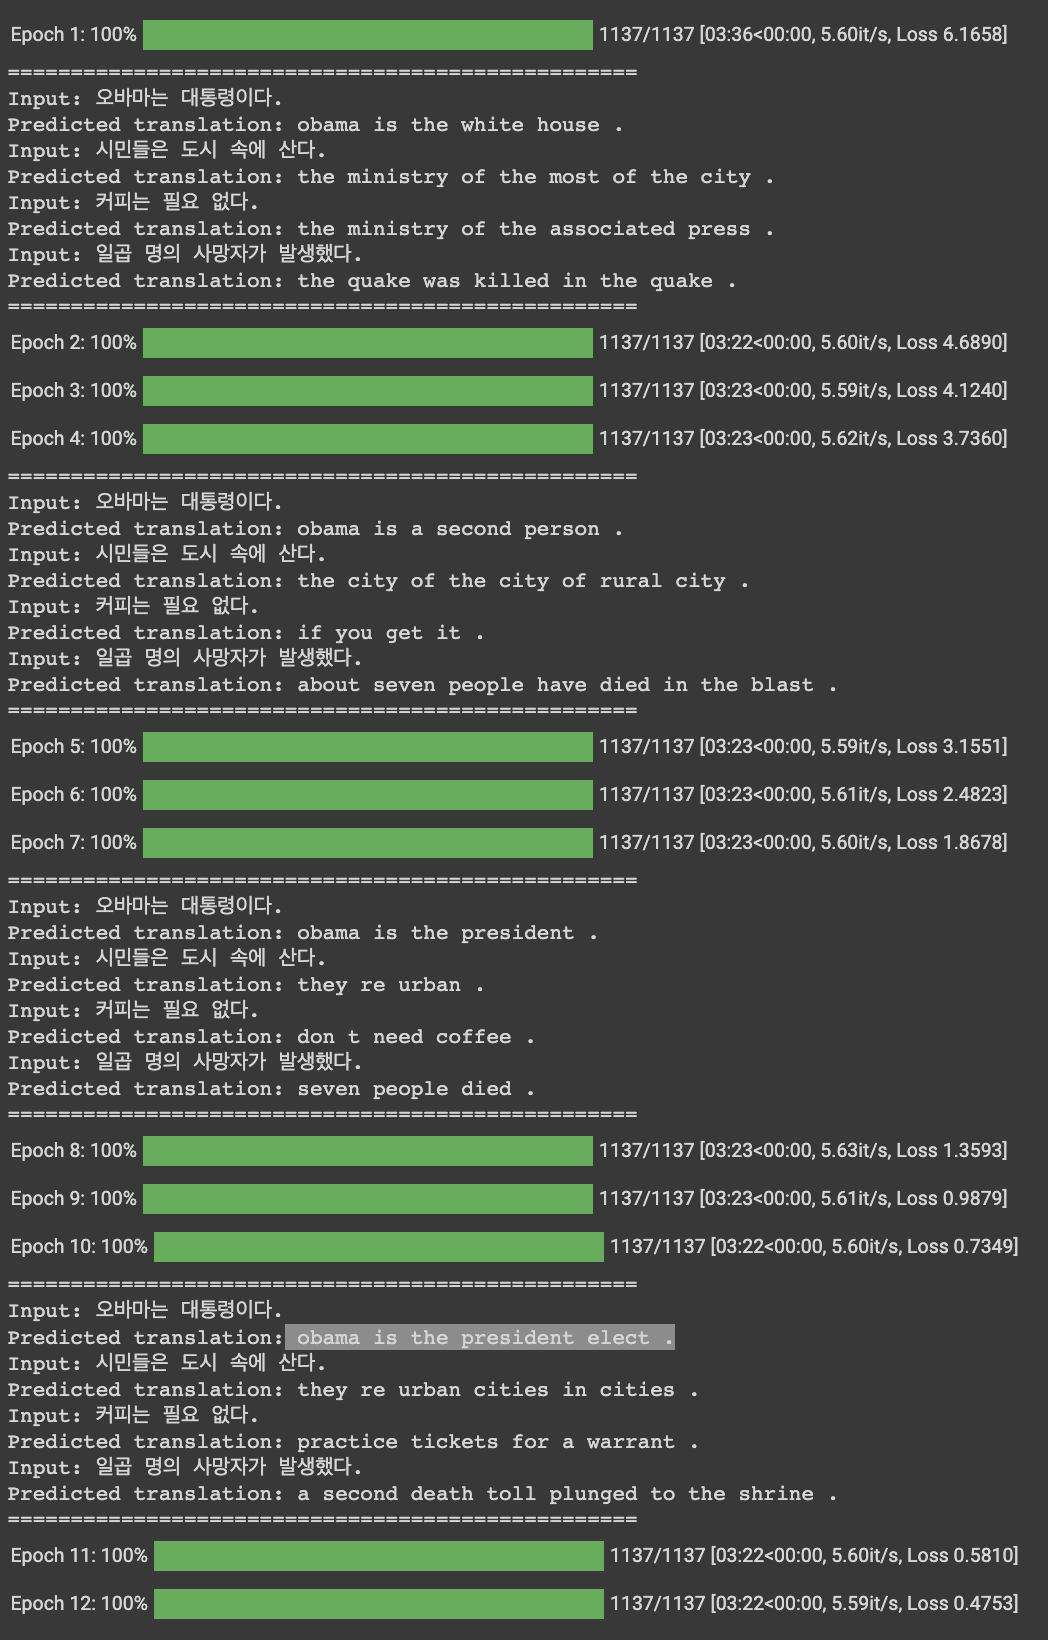

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


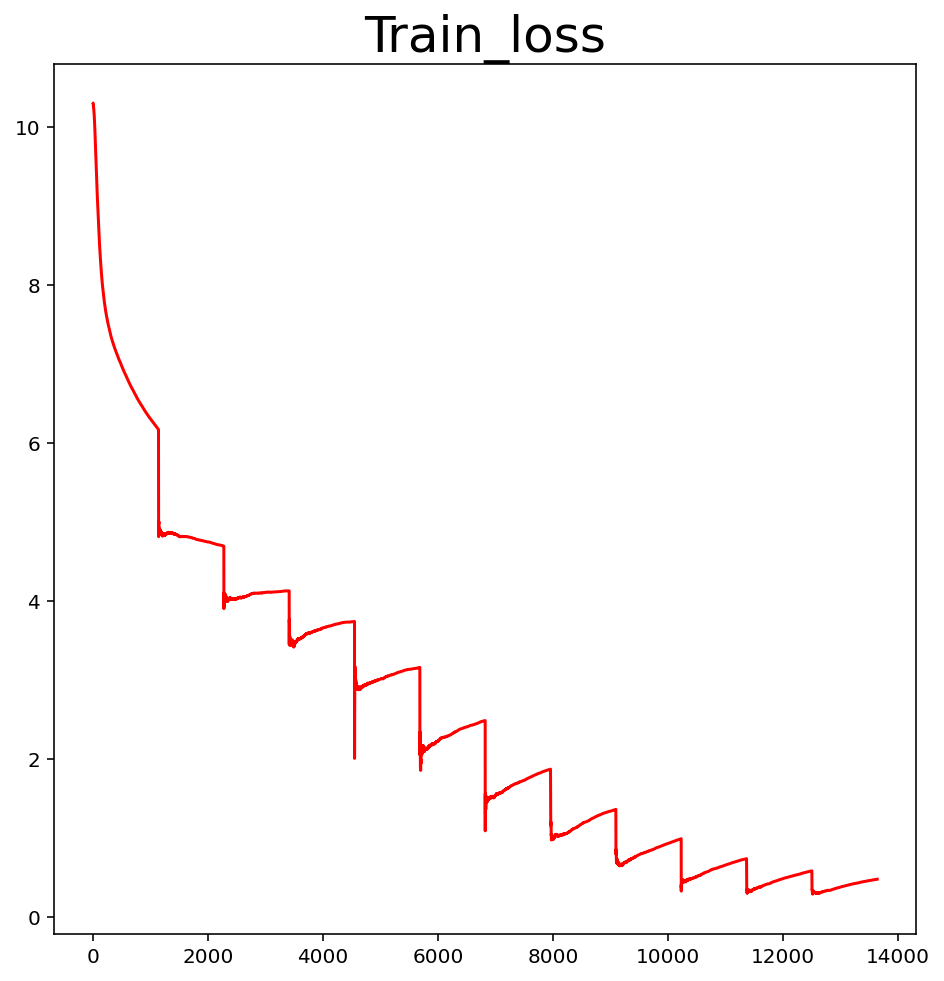

In [ ]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.title('Train_loss',fontsize = 25)
plt.plot(train_loss, color = 'r')

loss값이 지속적으로 감소는 추세를 보인다. 다만, 번역의 내용 역시 크게 개선 되는 듯 한 모습을 보이지는 않는다.

---
### 6-4 data_size 늘려보기
---

- 기존 토큰의 길이가 50이하일 경우 데이터의 개수는 72760이었다. 
- 토큰의 길이를 80이하로 늘릴 경우 데이터의 개수가 78697로 늘어난다.

In [ ]:
# 학습
BATCH_SIZE = 64
EPOCHS = 10
train_loss = []

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss, enc_attns, dec_attns, dec_enc_attns = \
        train_step(enc_train[idx:idx+BATCH_SIZE],
                    dec_train[idx:idx+BATCH_SIZE],
                    transformer,
                    optimizer)

        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))
        train_loss.append((total_loss.numpy() / (batch + 1)))
    if epoch % 2 == 0:
        for example in examples:
            translate(example, transformer, ko_tokenizer, en_tokenizer,  plot_attention=False)
        

  0%|          | 0/1230 [00:00<?, ?it/s]

Input: 오바마는 대통령이다.
Predicted translation: obama s president obama s president obama s president obama s president obama .
Input: 시민들은 도시 속에 산다.
Predicted translation: the city of the city of the city .
Input: 커피는 필요 없다.
Predicted translation: the show is no .
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: the death toll was found in the capital .


  0%|          | 0/1230 [00:00<?, ?it/s]

  0%|          | 0/1230 [00:00<?, ?it/s]

Input: 오바마는 대통령이다.
Predicted translation: president elect barack obama is a president .
Input: 시민들은 도시 속에 산다.
Predicted translation: citizens are in cities .
Input: 커피는 필요 없다.
Predicted translation: coffee coffee was not coffee .
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: the dead were killed in the town of the town .


  0%|          | 0/1230 [00:00<?, ?it/s]

  0%|          | 0/1230 [00:00<?, ?it/s]

Input: 오바마는 대통령이다.
Predicted translation: obama is the latest in a series of attack obama .
Input: 시민들은 도시 속에 산다.
Predicted translation: the city is in the mountain .
Input: 커피는 필요 없다.
Predicted translation: there must be no need to be coffee .
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: seven seven seven were killed .


  0%|          | 0/1230 [00:00<?, ?it/s]

  0%|          | 0/1230 [00:00<?, ?it/s]

Input: 오바마는 대통령이다.
Predicted translation: he s a president .
Input: 시민들은 도시 속에 산다.
Predicted translation: they are city mayors .
Input: 커피는 필요 없다.
Predicted translation: tickets for a coffee .
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: seven dead were killed in the blasts .


  0%|          | 0/1230 [00:00<?, ?it/s]

  0%|          | 0/1230 [00:00<?, ?it/s]

Input: 오바마는 대통령이다.
Predicted translation: obama is the world .
Input: 시민들은 도시 속에 산다.
Predicted translation: they ll be in the city .
Input: 커피는 필요 없다.
Predicted translation: the coffee need for cup .
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: seven others were dead the seven member united nations .


  0%|          | 0/1230 [00:00<?, ?it/s]

클라우드 환경에서 학습을 하고 옮기는 과정에서 loss값의 수치값은 사라졌다.  
epoch 2회당 예측번역 문장을 추출하여 문장 변화 추이를 확인한 결과이다.   
대부분 비슷하나 4번째 결과값이 그나마 좋아 보인다.  

---
### 6-5 vocab_size 늘려보기
---

- Vocab 최대 사이즈인 26978에 가까운 26900로 설정하여 확인해 보겠다. 
- 즉, 20000 -> 26900 로 변경 
- batch_size = 64 -> 128로 변경

In [ ]:
# 학습
BATCH_SIZE = 128
EPOCHS = 12
train_loss = []

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss, enc_attns, dec_attns, dec_enc_attns = \
        train_step(enc_train[idx:idx+BATCH_SIZE],
                    dec_train[idx:idx+BATCH_SIZE],
                    transformer,
                    optimizer)

        total_loss += batch_loss
        
        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))
        train_loss.append((total_loss.numpy() / (batch + 1)))
    if epoch % 3 == 0:
        print('='*50)
        for example in examples:
            translate(example, transformer, ko_tokenizer, en_tokenizer,  plot_attention=False)
        print('='*50)    
        

  0%|          | 0/572 [00:00<?, ?it/s]

Input: 오바마는 대통령이다.
Predicted translation: obama s obama s .
Input: 시민들은 도시 속에 산다.
Predicted translation: the city of the same .
Input: 커피는 필요 없다.
Predicted translation: the korean is a statement .
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: the korea s .


  0%|          | 0/572 [00:00<?, ?it/s]

  0%|          | 0/572 [00:00<?, ?it/s]

  0%|          | 0/572 [00:00<?, ?it/s]

Input: 오바마는 대통령이다.
Predicted translation: obama is the president .
Input: 시민들은 도시 속에 산다.
Predicted translation: they are taking the city .
Input: 커피는 필요 없다.
Predicted translation: it is a good thing .
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: the death toll was killed .


  0%|          | 0/572 [00:00<?, ?it/s]

  0%|          | 0/572 [00:00<?, ?it/s]

  0%|          | 0/572 [00:00<?, ?it/s]

Input: 오바마는 대통령이다.
Predicted translation: president obama is president of obama s president
Input: 시민들은 도시 속에 산다.
Predicted translation: they help the busy s urban terrain .
Input: 커피는 필요 없다.
Predicted translation: it is necessary to go .
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: seven deaths in the number of deaths .


  0%|          | 0/572 [00:00<?, ?it/s]

  0%|          | 0/572 [00:00<?, ?it/s]

  0%|          | 0/572 [00:00<?, ?it/s]

Input: 오바마는 대통령이다.
Predicted translation: obama is projecting president .
Input: 시민들은 도시 속에 산다.
Predicted translation: they are citys in the city .
Input: 커피는 필요 없다.
Predicted translation: it needs take no coffee need for coffee need coffee .
Input: 일곱 명의 사망자가 발생했다.
Predicted translation: seven deaths including the genocide .


  0%|          | 0/572 [00:00<?, ?it/s]

  0%|          | 0/572 [00:00<?, ?it/s]

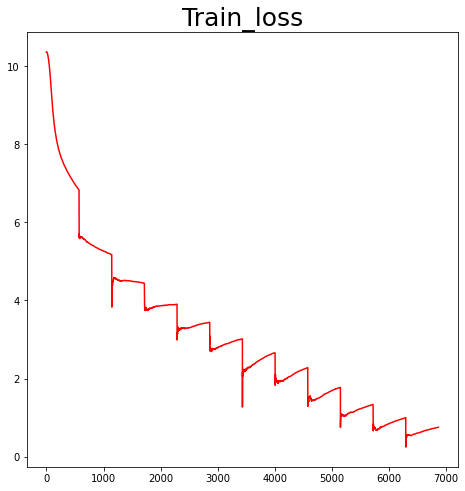

In [ ]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.title('Train_loss',fontsize = 25)
plt.plot(train_loss, color = 'r')

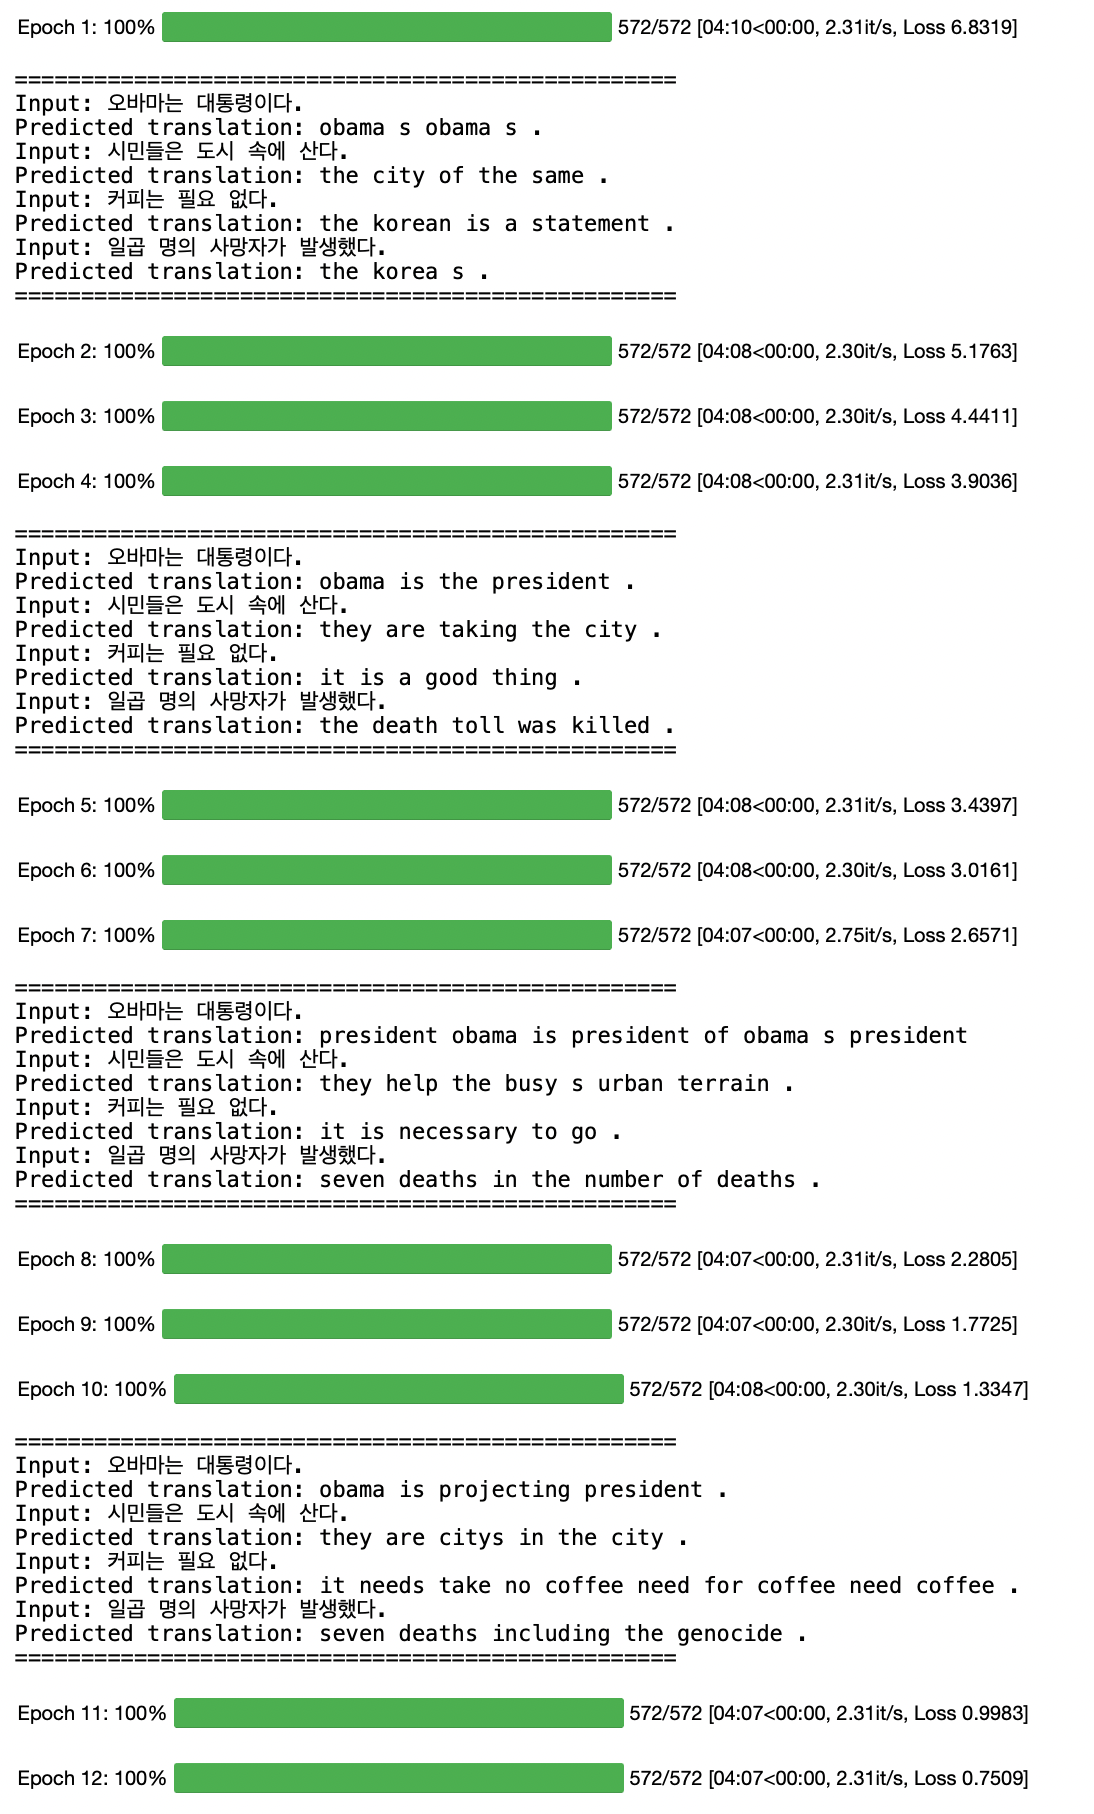

마지막 번역한 문장을 보면 커피에 관한 번역에서 다소 오류가 있지만,  
해당 문장을 제외하고는 지금까지 중에 가장 괜찮은 번역이 나온 것 같다.  
배치사이즈를 늘려주는 것에 영향이 좋은 것 같다.

---
# 7. 회고
---


- 번역의 성능은 이전 Seq2Seq 보다는 증가한 것 같다.
- 다만, 여전히 완벽한 번역은 하지 못한다. 
- 성능 개선을 위해 여러가지 방법을 시도해 보았지만, 명확하게 어떤 값을 변경했을 때, 성능이 향상이 되는지 확실한 답을 얻지는 못 했다. 